In [1]:
from PIL import Image
import numpy as np
import scipy

In [2]:
image = Image.open('img_input.jpg', 'r')

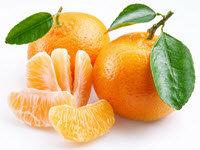

In [3]:
image

In [4]:
height , width = image.size

In [5]:
height

200

In [6]:
width

150

In [7]:
pix_val = list(image.getdata())

## ابتدا پیکسل های عکس ورودی را استخراج میکنیم که دارای عرض عکس * طول عکس  عضو هست که هر کدام سه مقدار دارند که نشان دهنده آر جی بی هست

In [8]:
pix_val

[(249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (249, 250, 252),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251, 253),
 (250, 251

In [9]:
len(pix_val)

30000

In [10]:
pix_val_flat = [x for sets in pix_val for x in sets]

## در اینجا لیست قبلی که پیکسل های عکس بود را فلت میکنیم یعنی به یک لیست تک بعدی در می آوریم. در واقع قبل از آن دارای عضوهایی بود که هر کدام شامل سه مقدار آر جی بی بودند اما حالا همگی مقادیر را به یک لیست تک بعدی تبدیل میکنیم که به آن فلت کردن میگویند پس این لیست جدید دارای عرض عکس * طول عکس * 3 عضو هست

In [11]:
pix_val_flat

[249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 249,
 250,
 252,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251,
 253,
 250,
 251

In [12]:
len(pix_val_flat)

90000

## از این مرحله به بعد شروع به پیاده سازی الگوریتم ژنتیک میکنیم. ابتدا تابعی تحت عنوان ساخت کروموزم تعریف شده که کروموزومی به طول (عرض عکس * طول عکس * 3) میسازد یعنی هر کروموزوم به این تعداد ژن دارد که هر کدام از این ژن ها هم مقادیر آنها میتواند از 0 تا 255 باشد. این تابع برای ابتدای کار هست که میخواهیم جمعیت اولیه ای بسازیم که هر کدام از این عضوهای جمعیت که کروموزوم هستند دارای ژن هایی با مقادیر تصادفی بین 0 تا 255 هست. در تابع تولید جمعیت هم یک لیستی داریم که هر کدام از اعضای آن کروموزوم هستند و این جمعیت اولیه به این صورت به صورت تصادفی ایجاد میشود. تعداد کروموزوم های اولیه هم یک ابرپارامتر هست که ما برای مثال مقدار آن را 30 قرار داده ایم یعنی جمعیت ما شامل 30 تا کروموزوم هست

In [13]:
def create_chromosom(size_list):
    my_list = list()
    for i in range(size_list):
        my_list.append(random.randint(0, 255))
    return my_list    

In [14]:
import random
#initialize population
def create_population(num_initial_chromosom):
    population = list()
    for i in range(num_initial_chromosom):
        population.append(create_chromosom(len(pix_val_flat)))
    return population

In [15]:
num_initial_chromosom = 30
my_population = create_population(num_initial_chromosom)

## تابع برازندگی هم به صورت زیر تعریف شده که برای هر کروموزومی که مقدار برازندگی آن را میخواهد به دست آورد بدین صورت  هست که برای هر کدام از ژن ها قدر مطلق اختلاف بین پیکسل ورودی و عدد هر ژن  را به دست می آورد و در نهایت این مقادیر را با هم جمع میزند مثلا اگر مقدار عضو اول پیکسل ورودی 200 باشد و مقدار ژن اول کروموزوم 150 باشد آنگاه عدد 50 را به عنوان اختلاف به دست می آورد. سپس این کار را برای همه این اعضای لیست انجام میدهد و در نهایت این مقادیر به دست آمده را با هم جمع میزند و به عنوان تابع برازندگی حساب میشود. توجه شود که در اینجا طبق فرضی که انجام شده این هست که هر چه مقدار تابع برازندگی یک کروموزوم کمتر باشد یعنی بهتر هست و شباهت بیشتری با پیکسل ورودی دارد و شانس انتخاب شدنش برای تولید نسل های بعدی بیشتر هست. برای تابع برازندگی از فرمول های دیگر مانند مربع خطا هم میتوان استفاده کرد

In [16]:
def calculate_fitness(chromosom):
    fitness = 0
    for i in range(len(pix_val_flat)):
        fitness = fitness + abs(pix_val_flat[i] - chromosom[i])
    return fitness   

## تابع زیر برای انتخاب شدن والد هست یعنی در فرایند تولید فرزند، کدام جفت والدها یا همان کروموزوم هایی که عضو جمعیت هستند انتخاب شوند. این عملیات انتخاب والد میتواند بر اساس الگوهای مختلف مانند رولت ویلر، اس یو اس، تورنومنت سلکشن یا رنک سلکشن انجام شود. در اینجا از تورنومنت سلکشن استفاده کرده ایم که بدین صورت هست که به طور رندوم و به تعدادی مشخص والدها را انتخاب میکنیم مثلا در کد زیر 4 والد به طور شانسی انتخاب شده اند. والد ها بر اساس میزان تابع برازندگی که دارند رنک بندی شده اند که این کار در قسمت تابع تولید بچه و قبل از تولید بچه و برای انتخاب والد ها انجام شده که کد آن هم به صورت زیر است
## rank_population = scipy.stats.rankdata(fitness)
## پس تا به اینجا مثلا 4 والد به طور رندوم انتخاب شده اند. حالا باید از بین این 4 تا آن والدی انتخاب شود که کمترین تابع برازندگی را دارد یعنی مناسبترین هست که برای پیدا کردن این کار می آید و رنک این والدهای انتخاب شده را بررسی میکند و کمترین را پیدا میکند که نشان میدهد برازندگی کمتری از بقیه دارد و در تابع زیر شماره ایندکس این والد را برمیگرداند به عنوان اینکه این والد برای تولید بچه انتخاب شده است. والد دیگر هم باز با فراخوانی این تابع انتخاب میشود و دو ایندکس به دست امده نشان میدهد که کدام جفت والد ها باید جفت شوند و بچه تولید کنند که این ایندکس ها در تابع تولید بچه مشخص شده و به دست آمده

In [17]:
def select_parent(rank_population):
    
    choice = list()
    num_random_select = 4
    for i in range(num_random_select):
        choice.append(random.randint(0, num_initial_chromosom - 1))
    
    #print(f"index of parents that are candidated: {choice}")
    
    #print("rank of parents that are candidated: ")
    #for i in range(num_random_select):
        #print(f"{rank_population[choice[i]]} ")
    
    min = choice[0]
    for i in range(num_random_select):
        if(rank_population[choice[i]] < rank_population[min]):
            min = choice[i]
    
    return min  

In [18]:
def mutation(child):
    gene1 = random.randint(0,len(child)-1)
    gene2 = random.randint(0,len(child)-1)
    temp = child[gene1]
    child[gene1] = child[gene2]
    child[gene2] = temp 

## در مورد سه خط اول تابع زیر که صحبت هایی در متن قبلی گفته شد. حال میخواهیم بچه را تولید کنیم که دارای تعدادی ژن هست که به تعداد همان ژن های والدش هست و همان اندازه پیکسل ورودی فلت شده. عملیات کراس اور صورت میگیرد که روش هایی مانند وان پوینت کراس اور، مالتی پوینت کراس اور و یونیفرم کراس اور وجود دارد. در اینجا از یونیفرم کراس اور استفاده شده یعنی برای تولید هر کدام از ژن های بچه ، به طور رندوم از ژن یکی از والدها استفاده میکند مثلا در کد زیر برای تولید هر ژن عددی تصادفی بین 0 تا 1 تولید میشود و اگر کمتر از 0.5 بود یعنی از والد اول انتخاب شود و اگر بیشتر از 0.5 بود از والد دوم انتخاب شود بنابراین هر ژن این بچه به طور رندوم و با احتمال مساوی یا از والد اول برداشته میشود یا از والد دوم

## و در نهایت تابع جهش صدا زده شده که بعد از عملیات کراس اور نیاز به جهش داریم. روش هایی مانند رندوم ریستینگ، جا به جایی(سویپ) وجود دارد. در اینجا از سویپ استفاده شده و احتمال اینکه جهش رخ دهد حدود 0.001 هست یعنی مثلا برای بچه ای که دارای 90000 ژن هست به تعداد 90 بار عملیات پرش رخ میدهد و دو تا از ژن ها با هم جا به جا میشوند. توجه شود که وجود جهش خیلی مهم هست چون اگر هیچ جهشی نداشته باشیم الگوریتم ما در نهایت به عددی همگرا میشود و دیگر هیچ بهبودی در کار نخواهیم داشت و انگار به جایی گیر میکنیم و اصلا خروجی مناسبی نخواهیم داشت به همین دلیل است که باید حتما جهش هم داشته باشیم اما احتمال رخداد آن باید کم باشد.  

In [19]:
def create_child(input_population , fitness):
    rank_population = scipy.stats.rankdata(fitness)
    index_parent1 = select_parent(rank_population)
    index_parent2 = select_parent(rank_population)
    
    #print(f"selected parents: {index_parent1} , {index_parent2}\n")
    #print(f"value of selected parents: {input_population[index_parent1]} ")
    #print(f"value of selected parents: {input_population[index_parent2]} ")
    
    child = list()
        
    
    #cross over
    for i in range(len(pix_val_flat)): 
        random_uniform_cost = random.uniform(0,1)
        if (random_uniform_cost <=0.5):
            child.append(input_population[index_parent1][i])
        else:
            child.append(input_population[index_parent2][i])
    #print(f"child is : {child}\n")
    
    #mutation
    num_swap_mutation = int(len(pix_val_flat) * 0.001)
    for i in range(num_swap_mutation):
        mutation(child)
    
    
    return child

## و در نهایت الگوریتم ژنتیک در زیر نوشته شده که به عنوان ورودی جمعیت را میگیرد و برای هر کدام از اعضای جمعیت تابع برازندگی را حساب میکند. بچه نیز با فراخوانی توابعی که در قسمت های بالا تعریف شده بود تولید میشود. عملیات سروایو سلکشن به چندین صورت میتواند باشد. یک راه این است که به تعداد والد ها بچه تولید کنیم و همه این بچه ها و نسل جدید جایگزین نسل قبل شوند. راه دیگر که ما نیز از این راه استفاده کرده ایم این است که به تعداد نیمی از والدها، بچه تولید شود و این بچه ها جایگزین نیمی از والدها شوند که این والدها آنهایی هستند که تابع برازندگی آنها خوب نیست یعنی مقدار بیشتری دارد و شباهت کمتری با پیکسل های ورودی. بنابراین این بچه های جدید به وجود آمده با والدهایی که مانده اند جمعیت جدید را تشکیل میدهند. و دوباره این اتفاق ها و جنریشن ها و تولید نسل بارها و بارها رخ میدهد و تعداد ایتریشن های ما هست یعنی چند بار این عملیات کل و این تابع ژنتیک اجرا شود. و در نهایت جمعیت نهایی بعد از تعدادی ایتریشن را به عنوان خروجی نهایی برمیگرداند که در متغیر آپدیت پاپولیشن هست که هر بار به ازای هر تکرار، این جمعیت به روز میشود

In [20]:
def genetic_algorithm(input_population , i):  
    print(f"\n iteration: {i+1}")
    fitness = list()
    for i in range(len(input_population)):
        fitness.append(calculate_fitness(input_population[i]))
        
    sum_fitness = 0
    for i in range(len(fitness)):
        sum_fitness = sum_fitness + fitness[i]
    print(f"sum of fitnesses is: {sum_fitness}\n")
    
    children = list()
        
    for i in range(15):
        children.append(create_child(input_population , fitness))
        
    #survive selection    
    for i in range(15):
        find_index = fitness.index(max(fitness))
        fitness.pop(find_index)
        input_population.pop(find_index)
      
    new_population = input_population + children
    return new_population
        
    

In [21]:
num_iterations = 15000
update_population = genetic_algorithm(my_population,-1)
for i in range(num_iterations):   
    update_population = genetic_algorithm(update_population,i)


 iteration: 0
sum of fitnesses is: 270962146


 iteration: 1
sum of fitnesses is: 270416475


 iteration: 2
sum of fitnesses is: 270069625


 iteration: 3
sum of fitnesses is: 269542034


 iteration: 4
sum of fitnesses is: 269108266


 iteration: 5
sum of fitnesses is: 268649518


 iteration: 6
sum of fitnesses is: 268326996


 iteration: 7
sum of fitnesses is: 268132611


 iteration: 8
sum of fitnesses is: 267847283


 iteration: 9
sum of fitnesses is: 267577882


 iteration: 10
sum of fitnesses is: 267322188


 iteration: 11
sum of fitnesses is: 267161856


 iteration: 12
sum of fitnesses is: 267115793


 iteration: 13
sum of fitnesses is: 266995077


 iteration: 14
sum of fitnesses is: 266859506


 iteration: 15
sum of fitnesses is: 266753741


 iteration: 16
sum of fitnesses is: 266581467


 iteration: 17
sum of fitnesses is: 266453060


 iteration: 18
sum of fitnesses is: 266306731


 iteration: 19
sum of fitnesses is: 266148825


 iteration: 20
sum of fitnesses is: 266015533


 


 iteration: 170
sum of fitnesses is: 258657707


 iteration: 171
sum of fitnesses is: 258613199


 iteration: 172
sum of fitnesses is: 258581390


 iteration: 173
sum of fitnesses is: 258547804


 iteration: 174
sum of fitnesses is: 258501182


 iteration: 175
sum of fitnesses is: 258433510


 iteration: 176
sum of fitnesses is: 258399403


 iteration: 177
sum of fitnesses is: 258353915


 iteration: 178
sum of fitnesses is: 258283039


 iteration: 179
sum of fitnesses is: 258243827


 iteration: 180
sum of fitnesses is: 258214066


 iteration: 181
sum of fitnesses is: 258184341


 iteration: 182
sum of fitnesses is: 258127334


 iteration: 183
sum of fitnesses is: 258069118


 iteration: 184
sum of fitnesses is: 258006281


 iteration: 185
sum of fitnesses is: 257968642


 iteration: 186
sum of fitnesses is: 257934397


 iteration: 187
sum of fitnesses is: 257903154


 iteration: 188
sum of fitnesses is: 257844261


 iteration: 189
sum of fitnesses is: 257802649


 iteration: 190
sum

sum of fitnesses is: 252735617


 iteration: 338
sum of fitnesses is: 252700113


 iteration: 339
sum of fitnesses is: 252662431


 iteration: 340
sum of fitnesses is: 252627309


 iteration: 341
sum of fitnesses is: 252594004


 iteration: 342
sum of fitnesses is: 252556363


 iteration: 343
sum of fitnesses is: 252523390


 iteration: 344
sum of fitnesses is: 252490073


 iteration: 345
sum of fitnesses is: 252441882


 iteration: 346
sum of fitnesses is: 252384316


 iteration: 347
sum of fitnesses is: 252301324


 iteration: 348
sum of fitnesses is: 252262009


 iteration: 349
sum of fitnesses is: 252233502


 iteration: 350
sum of fitnesses is: 252215217


 iteration: 351
sum of fitnesses is: 252197790


 iteration: 352
sum of fitnesses is: 252186418


 iteration: 353
sum of fitnesses is: 252166750


 iteration: 354
sum of fitnesses is: 252151434


 iteration: 355
sum of fitnesses is: 252130322


 iteration: 356
sum of fitnesses is: 252092637


 iteration: 357
sum of fitnesses is:


 iteration: 505
sum of fitnesses is: 246803958


 iteration: 506
sum of fitnesses is: 246786340


 iteration: 507
sum of fitnesses is: 246762504


 iteration: 508
sum of fitnesses is: 246741910


 iteration: 509
sum of fitnesses is: 246713823


 iteration: 510
sum of fitnesses is: 246678624


 iteration: 511
sum of fitnesses is: 246636290


 iteration: 512
sum of fitnesses is: 246599630


 iteration: 513
sum of fitnesses is: 246551987


 iteration: 514
sum of fitnesses is: 246520056


 iteration: 515
sum of fitnesses is: 246466493


 iteration: 516
sum of fitnesses is: 246408210


 iteration: 517
sum of fitnesses is: 246378404


 iteration: 518
sum of fitnesses is: 246360407


 iteration: 519
sum of fitnesses is: 246319232


 iteration: 520
sum of fitnesses is: 246293955


 iteration: 521
sum of fitnesses is: 246259645


 iteration: 522
sum of fitnesses is: 246223471


 iteration: 523
sum of fitnesses is: 246185795


 iteration: 524
sum of fitnesses is: 246148569


 iteration: 525
sum

sum of fitnesses is: 241621930


 iteration: 673
sum of fitnesses is: 241597870


 iteration: 674
sum of fitnesses is: 241561570


 iteration: 675
sum of fitnesses is: 241532060


 iteration: 676
sum of fitnesses is: 241489802


 iteration: 677
sum of fitnesses is: 241472037


 iteration: 678
sum of fitnesses is: 241443101


 iteration: 679
sum of fitnesses is: 241409959


 iteration: 680
sum of fitnesses is: 241404325


 iteration: 681
sum of fitnesses is: 241382506


 iteration: 682
sum of fitnesses is: 241360241


 iteration: 683
sum of fitnesses is: 241342917


 iteration: 684
sum of fitnesses is: 241320919


 iteration: 685
sum of fitnesses is: 241302080


 iteration: 686
sum of fitnesses is: 241281818


 iteration: 687
sum of fitnesses is: 241270163


 iteration: 688
sum of fitnesses is: 241237176


 iteration: 689
sum of fitnesses is: 241213770


 iteration: 690
sum of fitnesses is: 241193500


 iteration: 691
sum of fitnesses is: 241175400


 iteration: 692
sum of fitnesses is:


 iteration: 840
sum of fitnesses is: 237832834


 iteration: 841
sum of fitnesses is: 237805754


 iteration: 842
sum of fitnesses is: 237787807


 iteration: 843
sum of fitnesses is: 237770116


 iteration: 844
sum of fitnesses is: 237760099


 iteration: 845
sum of fitnesses is: 237713724


 iteration: 846
sum of fitnesses is: 237706527


 iteration: 847
sum of fitnesses is: 237680655


 iteration: 848
sum of fitnesses is: 237661343


 iteration: 849
sum of fitnesses is: 237623809


 iteration: 850
sum of fitnesses is: 237573013


 iteration: 851
sum of fitnesses is: 237537017


 iteration: 852
sum of fitnesses is: 237504842


 iteration: 853
sum of fitnesses is: 237501973


 iteration: 854
sum of fitnesses is: 237482834


 iteration: 855
sum of fitnesses is: 237450204


 iteration: 856
sum of fitnesses is: 237434912


 iteration: 857
sum of fitnesses is: 237420611


 iteration: 858
sum of fitnesses is: 237418392


 iteration: 859
sum of fitnesses is: 237401558


 iteration: 860
sum

sum of fitnesses is: 234329117


 iteration: 1008
sum of fitnesses is: 234308533


 iteration: 1009
sum of fitnesses is: 234288015


 iteration: 1010
sum of fitnesses is: 234251262


 iteration: 1011
sum of fitnesses is: 234251944


 iteration: 1012
sum of fitnesses is: 234218304


 iteration: 1013
sum of fitnesses is: 234207985


 iteration: 1014
sum of fitnesses is: 234195605


 iteration: 1015
sum of fitnesses is: 234191920


 iteration: 1016
sum of fitnesses is: 234175458


 iteration: 1017
sum of fitnesses is: 234173342


 iteration: 1018
sum of fitnesses is: 234148274


 iteration: 1019
sum of fitnesses is: 234135463


 iteration: 1020
sum of fitnesses is: 234102822


 iteration: 1021
sum of fitnesses is: 234095341


 iteration: 1022
sum of fitnesses is: 234068202


 iteration: 1023
sum of fitnesses is: 234054481


 iteration: 1024
sum of fitnesses is: 234024318


 iteration: 1025
sum of fitnesses is: 234005258


 iteration: 1026
sum of fitnesses is: 233977784


 iteration: 1027


sum of fitnesses is: 230818889


 iteration: 1172
sum of fitnesses is: 230784923


 iteration: 1173
sum of fitnesses is: 230765602


 iteration: 1174
sum of fitnesses is: 230743248


 iteration: 1175
sum of fitnesses is: 230729959


 iteration: 1176
sum of fitnesses is: 230706643


 iteration: 1177
sum of fitnesses is: 230688705


 iteration: 1178
sum of fitnesses is: 230675415


 iteration: 1179
sum of fitnesses is: 230654895


 iteration: 1180
sum of fitnesses is: 230657594


 iteration: 1181
sum of fitnesses is: 230646492


 iteration: 1182
sum of fitnesses is: 230647866


 iteration: 1183
sum of fitnesses is: 230626317


 iteration: 1184
sum of fitnesses is: 230633702


 iteration: 1185
sum of fitnesses is: 230618764


 iteration: 1186
sum of fitnesses is: 230590713


 iteration: 1187
sum of fitnesses is: 230582870


 iteration: 1188
sum of fitnesses is: 230572922


 iteration: 1189
sum of fitnesses is: 230552111


 iteration: 1190
sum of fitnesses is: 230540529


 iteration: 1191


sum of fitnesses is: 228002255


 iteration: 1336
sum of fitnesses is: 227972522


 iteration: 1337
sum of fitnesses is: 227956898


 iteration: 1338
sum of fitnesses is: 227933317


 iteration: 1339
sum of fitnesses is: 227914902


 iteration: 1340
sum of fitnesses is: 227883558


 iteration: 1341
sum of fitnesses is: 227866206


 iteration: 1342
sum of fitnesses is: 227849569


 iteration: 1343
sum of fitnesses is: 227846591


 iteration: 1344
sum of fitnesses is: 227823950


 iteration: 1345
sum of fitnesses is: 227801964


 iteration: 1346
sum of fitnesses is: 227800282


 iteration: 1347
sum of fitnesses is: 227788622


 iteration: 1348
sum of fitnesses is: 227773143


 iteration: 1349
sum of fitnesses is: 227759863


 iteration: 1350
sum of fitnesses is: 227738854


 iteration: 1351
sum of fitnesses is: 227730860


 iteration: 1352
sum of fitnesses is: 227706109


 iteration: 1353
sum of fitnesses is: 227689251


 iteration: 1354
sum of fitnesses is: 227670411


 iteration: 1355


sum of fitnesses is: 225165464


 iteration: 1500
sum of fitnesses is: 225149736


 iteration: 1501
sum of fitnesses is: 225138793


 iteration: 1502
sum of fitnesses is: 225134693


 iteration: 1503
sum of fitnesses is: 225126702


 iteration: 1504
sum of fitnesses is: 225111761


 iteration: 1505
sum of fitnesses is: 225092926


 iteration: 1506
sum of fitnesses is: 225067164


 iteration: 1507
sum of fitnesses is: 225050246


 iteration: 1508
sum of fitnesses is: 225015272


 iteration: 1509
sum of fitnesses is: 224992954


 iteration: 1510
sum of fitnesses is: 224978526


 iteration: 1511
sum of fitnesses is: 224964680


 iteration: 1512
sum of fitnesses is: 224940238


 iteration: 1513
sum of fitnesses is: 224923858


 iteration: 1514
sum of fitnesses is: 224908395


 iteration: 1515
sum of fitnesses is: 224885237


 iteration: 1516
sum of fitnesses is: 224889178


 iteration: 1517
sum of fitnesses is: 224873629


 iteration: 1518
sum of fitnesses is: 224839596


 iteration: 1519


sum of fitnesses is: 222445672


 iteration: 1664
sum of fitnesses is: 222428874


 iteration: 1665
sum of fitnesses is: 222419791


 iteration: 1666
sum of fitnesses is: 222407191


 iteration: 1667
sum of fitnesses is: 222391427


 iteration: 1668
sum of fitnesses is: 222382447


 iteration: 1669
sum of fitnesses is: 222364086


 iteration: 1670
sum of fitnesses is: 222356558


 iteration: 1671
sum of fitnesses is: 222347027


 iteration: 1672
sum of fitnesses is: 222328986


 iteration: 1673
sum of fitnesses is: 222300698


 iteration: 1674
sum of fitnesses is: 222273913


 iteration: 1675
sum of fitnesses is: 222242172


 iteration: 1676
sum of fitnesses is: 222212833


 iteration: 1677
sum of fitnesses is: 222201589


 iteration: 1678
sum of fitnesses is: 222175102


 iteration: 1679
sum of fitnesses is: 222146875


 iteration: 1680
sum of fitnesses is: 222141212


 iteration: 1681
sum of fitnesses is: 222126714


 iteration: 1682
sum of fitnesses is: 222118806


 iteration: 1683


sum of fitnesses is: 220177172


 iteration: 1828
sum of fitnesses is: 220138605


 iteration: 1829
sum of fitnesses is: 220124809


 iteration: 1830
sum of fitnesses is: 220103812


 iteration: 1831
sum of fitnesses is: 220078853


 iteration: 1832
sum of fitnesses is: 220051379


 iteration: 1833
sum of fitnesses is: 220033826


 iteration: 1834
sum of fitnesses is: 220015483


 iteration: 1835
sum of fitnesses is: 219997508


 iteration: 1836
sum of fitnesses is: 219980732


 iteration: 1837
sum of fitnesses is: 219963931


 iteration: 1838
sum of fitnesses is: 219945152


 iteration: 1839
sum of fitnesses is: 219933446


 iteration: 1840
sum of fitnesses is: 219918268


 iteration: 1841
sum of fitnesses is: 219911671


 iteration: 1842
sum of fitnesses is: 219887314


 iteration: 1843
sum of fitnesses is: 219869690


 iteration: 1844
sum of fitnesses is: 219856206


 iteration: 1845
sum of fitnesses is: 219856871


 iteration: 1846
sum of fitnesses is: 219834872


 iteration: 1847


sum of fitnesses is: 217862389


 iteration: 1992
sum of fitnesses is: 217845255


 iteration: 1993
sum of fitnesses is: 217838941


 iteration: 1994
sum of fitnesses is: 217827224


 iteration: 1995
sum of fitnesses is: 217814359


 iteration: 1996
sum of fitnesses is: 217792830


 iteration: 1997
sum of fitnesses is: 217784737


 iteration: 1998
sum of fitnesses is: 217778832


 iteration: 1999
sum of fitnesses is: 217754723


 iteration: 2000
sum of fitnesses is: 217773562


 iteration: 2001
sum of fitnesses is: 217753203


 iteration: 2002
sum of fitnesses is: 217754936


 iteration: 2003
sum of fitnesses is: 217739618


 iteration: 2004
sum of fitnesses is: 217746259


 iteration: 2005
sum of fitnesses is: 217731353


 iteration: 2006
sum of fitnesses is: 217728666


 iteration: 2007
sum of fitnesses is: 217720626


 iteration: 2008
sum of fitnesses is: 217727341


 iteration: 2009
sum of fitnesses is: 217713323


 iteration: 2010
sum of fitnesses is: 217703057


 iteration: 2011


sum of fitnesses is: 215803027


 iteration: 2156
sum of fitnesses is: 215800396


 iteration: 2157
sum of fitnesses is: 215808964


 iteration: 2158
sum of fitnesses is: 215783178


 iteration: 2159
sum of fitnesses is: 215773554


 iteration: 2160
sum of fitnesses is: 215766906


 iteration: 2161
sum of fitnesses is: 215762248


 iteration: 2162
sum of fitnesses is: 215769598


 iteration: 2163
sum of fitnesses is: 215759734


 iteration: 2164
sum of fitnesses is: 215727663


 iteration: 2165
sum of fitnesses is: 215695974


 iteration: 2166
sum of fitnesses is: 215685486


 iteration: 2167
sum of fitnesses is: 215653878


 iteration: 2168
sum of fitnesses is: 215639607


 iteration: 2169
sum of fitnesses is: 215659475


 iteration: 2170
sum of fitnesses is: 215632897


 iteration: 2171
sum of fitnesses is: 215617567


 iteration: 2172
sum of fitnesses is: 215604322


 iteration: 2173
sum of fitnesses is: 215602131


 iteration: 2174
sum of fitnesses is: 215578948


 iteration: 2175


sum of fitnesses is: 214042902


 iteration: 2320
sum of fitnesses is: 214034726


 iteration: 2321
sum of fitnesses is: 214029246


 iteration: 2322
sum of fitnesses is: 214027614


 iteration: 2323
sum of fitnesses is: 213995947


 iteration: 2324
sum of fitnesses is: 213989559


 iteration: 2325
sum of fitnesses is: 213971122


 iteration: 2326
sum of fitnesses is: 213967375


 iteration: 2327
sum of fitnesses is: 213950647


 iteration: 2328
sum of fitnesses is: 213929579


 iteration: 2329
sum of fitnesses is: 213919076


 iteration: 2330
sum of fitnesses is: 213908120


 iteration: 2331
sum of fitnesses is: 213887527


 iteration: 2332
sum of fitnesses is: 213867131


 iteration: 2333
sum of fitnesses is: 213857142


 iteration: 2334
sum of fitnesses is: 213834613


 iteration: 2335
sum of fitnesses is: 213826094


 iteration: 2336
sum of fitnesses is: 213808643


 iteration: 2337
sum of fitnesses is: 213803693


 iteration: 2338
sum of fitnesses is: 213792550


 iteration: 2339


sum of fitnesses is: 212180283


 iteration: 2484
sum of fitnesses is: 212157028


 iteration: 2485
sum of fitnesses is: 212150386


 iteration: 2486
sum of fitnesses is: 212149562


 iteration: 2487
sum of fitnesses is: 212132843


 iteration: 2488
sum of fitnesses is: 212106597


 iteration: 2489
sum of fitnesses is: 212098538


 iteration: 2490
sum of fitnesses is: 212086979


 iteration: 2491
sum of fitnesses is: 212084970


 iteration: 2492
sum of fitnesses is: 212088793


 iteration: 2493
sum of fitnesses is: 212073788


 iteration: 2494
sum of fitnesses is: 212072273


 iteration: 2495
sum of fitnesses is: 212069415


 iteration: 2496
sum of fitnesses is: 212055490


 iteration: 2497
sum of fitnesses is: 212033350


 iteration: 2498
sum of fitnesses is: 212024839


 iteration: 2499
sum of fitnesses is: 212019237


 iteration: 2500
sum of fitnesses is: 212007729


 iteration: 2501
sum of fitnesses is: 211992575


 iteration: 2502
sum of fitnesses is: 211997515


 iteration: 2503


sum of fitnesses is: 210553390


 iteration: 2648
sum of fitnesses is: 210562450


 iteration: 2649
sum of fitnesses is: 210557073


 iteration: 2650
sum of fitnesses is: 210562924


 iteration: 2651
sum of fitnesses is: 210559371


 iteration: 2652
sum of fitnesses is: 210554634


 iteration: 2653
sum of fitnesses is: 210542700


 iteration: 2654
sum of fitnesses is: 210547956


 iteration: 2655
sum of fitnesses is: 210542751


 iteration: 2656
sum of fitnesses is: 210532284


 iteration: 2657
sum of fitnesses is: 210527181


 iteration: 2658
sum of fitnesses is: 210527196


 iteration: 2659
sum of fitnesses is: 210528507


 iteration: 2660
sum of fitnesses is: 210516102


 iteration: 2661
sum of fitnesses is: 210508127


 iteration: 2662
sum of fitnesses is: 210485646


 iteration: 2663
sum of fitnesses is: 210488583


 iteration: 2664
sum of fitnesses is: 210466944


 iteration: 2665
sum of fitnesses is: 210458482


 iteration: 2666
sum of fitnesses is: 210456665


 iteration: 2667


sum of fitnesses is: 209289610


 iteration: 2812
sum of fitnesses is: 209285991


 iteration: 2813
sum of fitnesses is: 209283838


 iteration: 2814
sum of fitnesses is: 209266712


 iteration: 2815
sum of fitnesses is: 209268371


 iteration: 2816
sum of fitnesses is: 209250557


 iteration: 2817
sum of fitnesses is: 209256010


 iteration: 2818
sum of fitnesses is: 209250554


 iteration: 2819
sum of fitnesses is: 209251316


 iteration: 2820
sum of fitnesses is: 209245325


 iteration: 2821
sum of fitnesses is: 209243018


 iteration: 2822
sum of fitnesses is: 209244607


 iteration: 2823
sum of fitnesses is: 209260015


 iteration: 2824
sum of fitnesses is: 209252260


 iteration: 2825
sum of fitnesses is: 209218937


 iteration: 2826
sum of fitnesses is: 209210366


 iteration: 2827
sum of fitnesses is: 209198536


 iteration: 2828
sum of fitnesses is: 209199063


 iteration: 2829
sum of fitnesses is: 209200474


 iteration: 2830
sum of fitnesses is: 209177184


 iteration: 2831


sum of fitnesses is: 207700800


 iteration: 2976
sum of fitnesses is: 207689303


 iteration: 2977
sum of fitnesses is: 207669353


 iteration: 2978
sum of fitnesses is: 207653647


 iteration: 2979
sum of fitnesses is: 207637086


 iteration: 2980
sum of fitnesses is: 207637564


 iteration: 2981
sum of fitnesses is: 207634357


 iteration: 2982
sum of fitnesses is: 207629556


 iteration: 2983
sum of fitnesses is: 207619865


 iteration: 2984
sum of fitnesses is: 207605341


 iteration: 2985
sum of fitnesses is: 207595226


 iteration: 2986
sum of fitnesses is: 207590565


 iteration: 2987
sum of fitnesses is: 207580740


 iteration: 2988
sum of fitnesses is: 207569503


 iteration: 2989
sum of fitnesses is: 207565977


 iteration: 2990
sum of fitnesses is: 207567038


 iteration: 2991
sum of fitnesses is: 207560416


 iteration: 2992
sum of fitnesses is: 207544826


 iteration: 2993
sum of fitnesses is: 207536713


 iteration: 2994
sum of fitnesses is: 207529815


 iteration: 2995


sum of fitnesses is: 206226900


 iteration: 3140
sum of fitnesses is: 206210984


 iteration: 3141
sum of fitnesses is: 206208500


 iteration: 3142
sum of fitnesses is: 206195508


 iteration: 3143
sum of fitnesses is: 206192832


 iteration: 3144
sum of fitnesses is: 206187501


 iteration: 3145
sum of fitnesses is: 206189624


 iteration: 3146
sum of fitnesses is: 206183407


 iteration: 3147
sum of fitnesses is: 206171975


 iteration: 3148
sum of fitnesses is: 206168311


 iteration: 3149
sum of fitnesses is: 206140003


 iteration: 3150
sum of fitnesses is: 206128695


 iteration: 3151
sum of fitnesses is: 206120182


 iteration: 3152
sum of fitnesses is: 206118571


 iteration: 3153
sum of fitnesses is: 206097184


 iteration: 3154
sum of fitnesses is: 206077889


 iteration: 3155
sum of fitnesses is: 206063504


 iteration: 3156
sum of fitnesses is: 206059153


 iteration: 3157
sum of fitnesses is: 206039262


 iteration: 3158
sum of fitnesses is: 206040020


 iteration: 3159


sum of fitnesses is: 204544445


 iteration: 3304
sum of fitnesses is: 204560532


 iteration: 3305
sum of fitnesses is: 204539617


 iteration: 3306
sum of fitnesses is: 204529663


 iteration: 3307
sum of fitnesses is: 204510569


 iteration: 3308
sum of fitnesses is: 204508747


 iteration: 3309
sum of fitnesses is: 204490833


 iteration: 3310
sum of fitnesses is: 204494308


 iteration: 3311
sum of fitnesses is: 204487908


 iteration: 3312
sum of fitnesses is: 204470606


 iteration: 3313
sum of fitnesses is: 204460703


 iteration: 3314
sum of fitnesses is: 204450239


 iteration: 3315
sum of fitnesses is: 204439199


 iteration: 3316
sum of fitnesses is: 204445958


 iteration: 3317
sum of fitnesses is: 204440183


 iteration: 3318
sum of fitnesses is: 204417501


 iteration: 3319
sum of fitnesses is: 204401168


 iteration: 3320
sum of fitnesses is: 204396051


 iteration: 3321
sum of fitnesses is: 204389106


 iteration: 3322
sum of fitnesses is: 204375908


 iteration: 3323


sum of fitnesses is: 203112999


 iteration: 3468
sum of fitnesses is: 203099566


 iteration: 3469
sum of fitnesses is: 203099254


 iteration: 3470
sum of fitnesses is: 203087031


 iteration: 3471
sum of fitnesses is: 203080582


 iteration: 3472
sum of fitnesses is: 203079284


 iteration: 3473
sum of fitnesses is: 203075596


 iteration: 3474
sum of fitnesses is: 203063978


 iteration: 3475
sum of fitnesses is: 203069678


 iteration: 3476
sum of fitnesses is: 203046904


 iteration: 3477
sum of fitnesses is: 203045663


 iteration: 3478
sum of fitnesses is: 203026586


 iteration: 3479
sum of fitnesses is: 203008717


 iteration: 3480
sum of fitnesses is: 202986338


 iteration: 3481
sum of fitnesses is: 202968714


 iteration: 3482
sum of fitnesses is: 202942405


 iteration: 3483
sum of fitnesses is: 202917650


 iteration: 3484
sum of fitnesses is: 202906462


 iteration: 3485
sum of fitnesses is: 202900117


 iteration: 3486
sum of fitnesses is: 202892388


 iteration: 3487


sum of fitnesses is: 201848309


 iteration: 3632
sum of fitnesses is: 201854980


 iteration: 3633
sum of fitnesses is: 201836392


 iteration: 3634
sum of fitnesses is: 201829111


 iteration: 3635
sum of fitnesses is: 201826454


 iteration: 3636
sum of fitnesses is: 201815052


 iteration: 3637
sum of fitnesses is: 201805312


 iteration: 3638
sum of fitnesses is: 201811015


 iteration: 3639
sum of fitnesses is: 201787294


 iteration: 3640
sum of fitnesses is: 201781585


 iteration: 3641
sum of fitnesses is: 201785531


 iteration: 3642
sum of fitnesses is: 201775183


 iteration: 3643
sum of fitnesses is: 201774942


 iteration: 3644
sum of fitnesses is: 201751999


 iteration: 3645
sum of fitnesses is: 201750462


 iteration: 3646
sum of fitnesses is: 201749051


 iteration: 3647
sum of fitnesses is: 201732373


 iteration: 3648
sum of fitnesses is: 201723226


 iteration: 3649
sum of fitnesses is: 201717226


 iteration: 3650
sum of fitnesses is: 201695105


 iteration: 3651


sum of fitnesses is: 200379320


 iteration: 3796
sum of fitnesses is: 200369393


 iteration: 3797
sum of fitnesses is: 200360283


 iteration: 3798
sum of fitnesses is: 200355963


 iteration: 3799
sum of fitnesses is: 200340120


 iteration: 3800
sum of fitnesses is: 200346998


 iteration: 3801
sum of fitnesses is: 200331034


 iteration: 3802
sum of fitnesses is: 200337766


 iteration: 3803
sum of fitnesses is: 200312700


 iteration: 3804
sum of fitnesses is: 200320604


 iteration: 3805
sum of fitnesses is: 200299650


 iteration: 3806
sum of fitnesses is: 200295298


 iteration: 3807
sum of fitnesses is: 200300888


 iteration: 3808
sum of fitnesses is: 200291513


 iteration: 3809
sum of fitnesses is: 200286001


 iteration: 3810
sum of fitnesses is: 200266397


 iteration: 3811
sum of fitnesses is: 200263256


 iteration: 3812
sum of fitnesses is: 200267839


 iteration: 3813
sum of fitnesses is: 200264165


 iteration: 3814
sum of fitnesses is: 200261216


 iteration: 3815


sum of fitnesses is: 199140446


 iteration: 3960
sum of fitnesses is: 199120918


 iteration: 3961
sum of fitnesses is: 199104050


 iteration: 3962
sum of fitnesses is: 199096489


 iteration: 3963
sum of fitnesses is: 199090324


 iteration: 3964
sum of fitnesses is: 199070087


 iteration: 3965
sum of fitnesses is: 199057678


 iteration: 3966
sum of fitnesses is: 199043668


 iteration: 3967
sum of fitnesses is: 199034735


 iteration: 3968
sum of fitnesses is: 199040159


 iteration: 3969
sum of fitnesses is: 199014440


 iteration: 3970
sum of fitnesses is: 199004030


 iteration: 3971
sum of fitnesses is: 199001464


 iteration: 3972
sum of fitnesses is: 198993906


 iteration: 3973
sum of fitnesses is: 198969954


 iteration: 3974
sum of fitnesses is: 198959925


 iteration: 3975
sum of fitnesses is: 198936647


 iteration: 3976
sum of fitnesses is: 198948743


 iteration: 3977
sum of fitnesses is: 198934731


 iteration: 3978
sum of fitnesses is: 198914846


 iteration: 3979


sum of fitnesses is: 197820296


 iteration: 4124
sum of fitnesses is: 197809357


 iteration: 4125
sum of fitnesses is: 197809201


 iteration: 4126
sum of fitnesses is: 197805718


 iteration: 4127
sum of fitnesses is: 197792365


 iteration: 4128
sum of fitnesses is: 197787780


 iteration: 4129
sum of fitnesses is: 197785306


 iteration: 4130
sum of fitnesses is: 197791129


 iteration: 4131
sum of fitnesses is: 197772943


 iteration: 4132
sum of fitnesses is: 197781462


 iteration: 4133
sum of fitnesses is: 197774781


 iteration: 4134
sum of fitnesses is: 197756841


 iteration: 4135
sum of fitnesses is: 197777132


 iteration: 4136
sum of fitnesses is: 197755804


 iteration: 4137
sum of fitnesses is: 197759476


 iteration: 4138
sum of fitnesses is: 197748346


 iteration: 4139
sum of fitnesses is: 197742844


 iteration: 4140
sum of fitnesses is: 197724954


 iteration: 4141
sum of fitnesses is: 197730449


 iteration: 4142
sum of fitnesses is: 197715279


 iteration: 4143


sum of fitnesses is: 196675930


 iteration: 4288
sum of fitnesses is: 196676939


 iteration: 4289
sum of fitnesses is: 196688581


 iteration: 4290
sum of fitnesses is: 196666531


 iteration: 4291
sum of fitnesses is: 196660415


 iteration: 4292
sum of fitnesses is: 196657659


 iteration: 4293
sum of fitnesses is: 196657168


 iteration: 4294
sum of fitnesses is: 196651207


 iteration: 4295
sum of fitnesses is: 196647228


 iteration: 4296
sum of fitnesses is: 196653620


 iteration: 4297
sum of fitnesses is: 196652976


 iteration: 4298
sum of fitnesses is: 196645116


 iteration: 4299
sum of fitnesses is: 196636393


 iteration: 4300
sum of fitnesses is: 196620855


 iteration: 4301
sum of fitnesses is: 196630216


 iteration: 4302
sum of fitnesses is: 196640008


 iteration: 4303
sum of fitnesses is: 196628108


 iteration: 4304
sum of fitnesses is: 196594927


 iteration: 4305
sum of fitnesses is: 196593850


 iteration: 4306
sum of fitnesses is: 196591214


 iteration: 4307


sum of fitnesses is: 195476757


 iteration: 4452
sum of fitnesses is: 195460698


 iteration: 4453
sum of fitnesses is: 195471958


 iteration: 4454
sum of fitnesses is: 195460267


 iteration: 4455
sum of fitnesses is: 195448974


 iteration: 4456
sum of fitnesses is: 195446371


 iteration: 4457
sum of fitnesses is: 195434616


 iteration: 4458
sum of fitnesses is: 195426733


 iteration: 4459
sum of fitnesses is: 195436962


 iteration: 4460
sum of fitnesses is: 195429823


 iteration: 4461
sum of fitnesses is: 195432693


 iteration: 4462
sum of fitnesses is: 195435973


 iteration: 4463
sum of fitnesses is: 195423790


 iteration: 4464
sum of fitnesses is: 195421473


 iteration: 4465
sum of fitnesses is: 195411369


 iteration: 4466
sum of fitnesses is: 195412418


 iteration: 4467
sum of fitnesses is: 195396025


 iteration: 4468
sum of fitnesses is: 195397500


 iteration: 4469
sum of fitnesses is: 195403250


 iteration: 4470
sum of fitnesses is: 195404684


 iteration: 4471


sum of fitnesses is: 194299290


 iteration: 4616
sum of fitnesses is: 194288720


 iteration: 4617
sum of fitnesses is: 194287386


 iteration: 4618
sum of fitnesses is: 194290550


 iteration: 4619
sum of fitnesses is: 194284404


 iteration: 4620
sum of fitnesses is: 194287400


 iteration: 4621
sum of fitnesses is: 194268699


 iteration: 4622
sum of fitnesses is: 194253642


 iteration: 4623
sum of fitnesses is: 194253322


 iteration: 4624
sum of fitnesses is: 194243445


 iteration: 4625
sum of fitnesses is: 194224045


 iteration: 4626
sum of fitnesses is: 194220908


 iteration: 4627
sum of fitnesses is: 194209267


 iteration: 4628
sum of fitnesses is: 194213248


 iteration: 4629
sum of fitnesses is: 194204582


 iteration: 4630
sum of fitnesses is: 194201074


 iteration: 4631
sum of fitnesses is: 194194279


 iteration: 4632
sum of fitnesses is: 194190331


 iteration: 4633
sum of fitnesses is: 194179551


 iteration: 4634
sum of fitnesses is: 194164491


 iteration: 4635


sum of fitnesses is: 193321084


 iteration: 4780
sum of fitnesses is: 193326248


 iteration: 4781
sum of fitnesses is: 193323110


 iteration: 4782
sum of fitnesses is: 193318991


 iteration: 4783
sum of fitnesses is: 193316157


 iteration: 4784
sum of fitnesses is: 193300486


 iteration: 4785
sum of fitnesses is: 193288550


 iteration: 4786
sum of fitnesses is: 193290407


 iteration: 4787
sum of fitnesses is: 193285548


 iteration: 4788
sum of fitnesses is: 193281915


 iteration: 4789
sum of fitnesses is: 193289310


 iteration: 4790
sum of fitnesses is: 193276857


 iteration: 4791
sum of fitnesses is: 193267443


 iteration: 4792
sum of fitnesses is: 193252884


 iteration: 4793
sum of fitnesses is: 193240600


 iteration: 4794
sum of fitnesses is: 193228761


 iteration: 4795
sum of fitnesses is: 193232769


 iteration: 4796
sum of fitnesses is: 193214700


 iteration: 4797
sum of fitnesses is: 193212488


 iteration: 4798
sum of fitnesses is: 193197903


 iteration: 4799


sum of fitnesses is: 192440294


 iteration: 4944
sum of fitnesses is: 192417161


 iteration: 4945
sum of fitnesses is: 192404966


 iteration: 4946
sum of fitnesses is: 192396087


 iteration: 4947
sum of fitnesses is: 192396060


 iteration: 4948
sum of fitnesses is: 192370616


 iteration: 4949
sum of fitnesses is: 192359493


 iteration: 4950
sum of fitnesses is: 192345224


 iteration: 4951
sum of fitnesses is: 192333758


 iteration: 4952
sum of fitnesses is: 192335338


 iteration: 4953
sum of fitnesses is: 192317993


 iteration: 4954
sum of fitnesses is: 192309254


 iteration: 4955
sum of fitnesses is: 192301846


 iteration: 4956
sum of fitnesses is: 192302970


 iteration: 4957
sum of fitnesses is: 192281151


 iteration: 4958
sum of fitnesses is: 192283640


 iteration: 4959
sum of fitnesses is: 192281118


 iteration: 4960
sum of fitnesses is: 192285000


 iteration: 4961
sum of fitnesses is: 192275140


 iteration: 4962
sum of fitnesses is: 192266049


 iteration: 4963


sum of fitnesses is: 191507823


 iteration: 5108
sum of fitnesses is: 191501653


 iteration: 5109
sum of fitnesses is: 191502391


 iteration: 5110
sum of fitnesses is: 191498768


 iteration: 5111
sum of fitnesses is: 191486771


 iteration: 5112
sum of fitnesses is: 191488849


 iteration: 5113
sum of fitnesses is: 191480010


 iteration: 5114
sum of fitnesses is: 191469474


 iteration: 5115
sum of fitnesses is: 191464309


 iteration: 5116
sum of fitnesses is: 191464185


 iteration: 5117
sum of fitnesses is: 191464768


 iteration: 5118
sum of fitnesses is: 191455152


 iteration: 5119
sum of fitnesses is: 191441452


 iteration: 5120
sum of fitnesses is: 191429310


 iteration: 5121
sum of fitnesses is: 191442806


 iteration: 5122
sum of fitnesses is: 191410594


 iteration: 5123
sum of fitnesses is: 191402258


 iteration: 5124
sum of fitnesses is: 191387610


 iteration: 5125
sum of fitnesses is: 191380296


 iteration: 5126
sum of fitnesses is: 191382126


 iteration: 5127


sum of fitnesses is: 190353221


 iteration: 5272
sum of fitnesses is: 190346737


 iteration: 5273
sum of fitnesses is: 190335115


 iteration: 5274
sum of fitnesses is: 190336107


 iteration: 5275
sum of fitnesses is: 190338023


 iteration: 5276
sum of fitnesses is: 190320105


 iteration: 5277
sum of fitnesses is: 190324020


 iteration: 5278
sum of fitnesses is: 190324844


 iteration: 5279
sum of fitnesses is: 190316098


 iteration: 5280
sum of fitnesses is: 190306670


 iteration: 5281
sum of fitnesses is: 190284000


 iteration: 5282
sum of fitnesses is: 190273527


 iteration: 5283
sum of fitnesses is: 190269697


 iteration: 5284
sum of fitnesses is: 190273390


 iteration: 5285
sum of fitnesses is: 190256314


 iteration: 5286
sum of fitnesses is: 190241377


 iteration: 5287
sum of fitnesses is: 190234722


 iteration: 5288
sum of fitnesses is: 190238602


 iteration: 5289
sum of fitnesses is: 190226046


 iteration: 5290
sum of fitnesses is: 190208296


 iteration: 5291


sum of fitnesses is: 189555892


 iteration: 5436
sum of fitnesses is: 189560247


 iteration: 5437
sum of fitnesses is: 189552089


 iteration: 5438
sum of fitnesses is: 189545418


 iteration: 5439
sum of fitnesses is: 189545914


 iteration: 5440
sum of fitnesses is: 189539995


 iteration: 5441
sum of fitnesses is: 189550131


 iteration: 5442
sum of fitnesses is: 189536787


 iteration: 5443
sum of fitnesses is: 189515705


 iteration: 5444
sum of fitnesses is: 189516178


 iteration: 5445
sum of fitnesses is: 189535990


 iteration: 5446
sum of fitnesses is: 189507959


 iteration: 5447
sum of fitnesses is: 189502310


 iteration: 5448
sum of fitnesses is: 189487574


 iteration: 5449
sum of fitnesses is: 189482143


 iteration: 5450
sum of fitnesses is: 189488986


 iteration: 5451
sum of fitnesses is: 189470588


 iteration: 5452
sum of fitnesses is: 189470281


 iteration: 5453
sum of fitnesses is: 189466260


 iteration: 5454
sum of fitnesses is: 189452079


 iteration: 5455


sum of fitnesses is: 188828333


 iteration: 5600
sum of fitnesses is: 188835959


 iteration: 5601
sum of fitnesses is: 188822410


 iteration: 5602
sum of fitnesses is: 188827754


 iteration: 5603
sum of fitnesses is: 188834896


 iteration: 5604
sum of fitnesses is: 188818166


 iteration: 5605
sum of fitnesses is: 188826067


 iteration: 5606
sum of fitnesses is: 188809227


 iteration: 5607
sum of fitnesses is: 188803701


 iteration: 5608
sum of fitnesses is: 188803585


 iteration: 5609
sum of fitnesses is: 188802437


 iteration: 5610
sum of fitnesses is: 188783492


 iteration: 5611
sum of fitnesses is: 188783850


 iteration: 5612
sum of fitnesses is: 188774169


 iteration: 5613
sum of fitnesses is: 188758040


 iteration: 5614
sum of fitnesses is: 188738921


 iteration: 5615
sum of fitnesses is: 188742263


 iteration: 5616
sum of fitnesses is: 188741554


 iteration: 5617
sum of fitnesses is: 188741106


 iteration: 5618
sum of fitnesses is: 188745425


 iteration: 5619


sum of fitnesses is: 187920805


 iteration: 5764
sum of fitnesses is: 187912419


 iteration: 5765
sum of fitnesses is: 187905982


 iteration: 5766
sum of fitnesses is: 187915302


 iteration: 5767
sum of fitnesses is: 187910766


 iteration: 5768
sum of fitnesses is: 187889660


 iteration: 5769
sum of fitnesses is: 187899781


 iteration: 5770
sum of fitnesses is: 187886970


 iteration: 5771
sum of fitnesses is: 187882182


 iteration: 5772
sum of fitnesses is: 187880083


 iteration: 5773
sum of fitnesses is: 187882327


 iteration: 5774
sum of fitnesses is: 187874127


 iteration: 5775
sum of fitnesses is: 187879764


 iteration: 5776
sum of fitnesses is: 187869765


 iteration: 5777
sum of fitnesses is: 187860602


 iteration: 5778
sum of fitnesses is: 187850703


 iteration: 5779
sum of fitnesses is: 187853158


 iteration: 5780
sum of fitnesses is: 187844728


 iteration: 5781
sum of fitnesses is: 187830954


 iteration: 5782
sum of fitnesses is: 187833777


 iteration: 5783


sum of fitnesses is: 187118027


 iteration: 5928
sum of fitnesses is: 187096710


 iteration: 5929
sum of fitnesses is: 187082998


 iteration: 5930
sum of fitnesses is: 187064511


 iteration: 5931
sum of fitnesses is: 187053623


 iteration: 5932
sum of fitnesses is: 187033315


 iteration: 5933
sum of fitnesses is: 187025624


 iteration: 5934
sum of fitnesses is: 187019282


 iteration: 5935
sum of fitnesses is: 187029636


 iteration: 5936
sum of fitnesses is: 187014496


 iteration: 5937
sum of fitnesses is: 187017686


 iteration: 5938
sum of fitnesses is: 187010818


 iteration: 5939
sum of fitnesses is: 187009700


 iteration: 5940
sum of fitnesses is: 186999987


 iteration: 5941
sum of fitnesses is: 187002541


 iteration: 5942
sum of fitnesses is: 186993319


 iteration: 5943
sum of fitnesses is: 186992163


 iteration: 5944
sum of fitnesses is: 186978911


 iteration: 5945
sum of fitnesses is: 186978571


 iteration: 5946
sum of fitnesses is: 186976896


 iteration: 5947


sum of fitnesses is: 186436935


 iteration: 6092
sum of fitnesses is: 186434293


 iteration: 6093
sum of fitnesses is: 186434649


 iteration: 6094
sum of fitnesses is: 186412514


 iteration: 6095
sum of fitnesses is: 186430416


 iteration: 6096
sum of fitnesses is: 186397188


 iteration: 6097
sum of fitnesses is: 186391012


 iteration: 6098
sum of fitnesses is: 186392825


 iteration: 6099
sum of fitnesses is: 186365605


 iteration: 6100
sum of fitnesses is: 186375138


 iteration: 6101
sum of fitnesses is: 186340723


 iteration: 6102
sum of fitnesses is: 186357753


 iteration: 6103
sum of fitnesses is: 186353708


 iteration: 6104
sum of fitnesses is: 186344005


 iteration: 6105
sum of fitnesses is: 186359035


 iteration: 6106
sum of fitnesses is: 186339290


 iteration: 6107
sum of fitnesses is: 186333984


 iteration: 6108
sum of fitnesses is: 186338721


 iteration: 6109
sum of fitnesses is: 186329054


 iteration: 6110
sum of fitnesses is: 186314480


 iteration: 6111


sum of fitnesses is: 185649549


 iteration: 6256
sum of fitnesses is: 185648769


 iteration: 6257
sum of fitnesses is: 185637533


 iteration: 6258
sum of fitnesses is: 185609187


 iteration: 6259
sum of fitnesses is: 185595355


 iteration: 6260
sum of fitnesses is: 185599623


 iteration: 6261
sum of fitnesses is: 185582163


 iteration: 6262
sum of fitnesses is: 185580417


 iteration: 6263
sum of fitnesses is: 185581925


 iteration: 6264
sum of fitnesses is: 185579017


 iteration: 6265
sum of fitnesses is: 185567243


 iteration: 6266
sum of fitnesses is: 185567069


 iteration: 6267
sum of fitnesses is: 185562698


 iteration: 6268
sum of fitnesses is: 185556903


 iteration: 6269
sum of fitnesses is: 185557654


 iteration: 6270
sum of fitnesses is: 185561323


 iteration: 6271
sum of fitnesses is: 185549127


 iteration: 6272
sum of fitnesses is: 185550627


 iteration: 6273
sum of fitnesses is: 185534717


 iteration: 6274
sum of fitnesses is: 185543610


 iteration: 6275


sum of fitnesses is: 184907942


 iteration: 6420
sum of fitnesses is: 184909011


 iteration: 6421
sum of fitnesses is: 184887629


 iteration: 6422
sum of fitnesses is: 184892769


 iteration: 6423
sum of fitnesses is: 184897261


 iteration: 6424
sum of fitnesses is: 184884663


 iteration: 6425
sum of fitnesses is: 184880551


 iteration: 6426
sum of fitnesses is: 184865626


 iteration: 6427
sum of fitnesses is: 184876330


 iteration: 6428
sum of fitnesses is: 184884052


 iteration: 6429
sum of fitnesses is: 184866558


 iteration: 6430
sum of fitnesses is: 184874633


 iteration: 6431
sum of fitnesses is: 184877428


 iteration: 6432
sum of fitnesses is: 184853046


 iteration: 6433
sum of fitnesses is: 184850668


 iteration: 6434
sum of fitnesses is: 184833408


 iteration: 6435
sum of fitnesses is: 184836405


 iteration: 6436
sum of fitnesses is: 184827411


 iteration: 6437
sum of fitnesses is: 184821743


 iteration: 6438
sum of fitnesses is: 184812213


 iteration: 6439


sum of fitnesses is: 184229046


 iteration: 6584
sum of fitnesses is: 184206693


 iteration: 6585
sum of fitnesses is: 184211052


 iteration: 6586
sum of fitnesses is: 184205975


 iteration: 6587
sum of fitnesses is: 184211823


 iteration: 6588
sum of fitnesses is: 184188473


 iteration: 6589
sum of fitnesses is: 184186799


 iteration: 6590
sum of fitnesses is: 184187484


 iteration: 6591
sum of fitnesses is: 184179071


 iteration: 6592
sum of fitnesses is: 184177591


 iteration: 6593
sum of fitnesses is: 184186205


 iteration: 6594
sum of fitnesses is: 184177001


 iteration: 6595
sum of fitnesses is: 184196518


 iteration: 6596
sum of fitnesses is: 184173961


 iteration: 6597
sum of fitnesses is: 184172542


 iteration: 6598
sum of fitnesses is: 184166706


 iteration: 6599
sum of fitnesses is: 184175488


 iteration: 6600
sum of fitnesses is: 184164112


 iteration: 6601
sum of fitnesses is: 184166853


 iteration: 6602
sum of fitnesses is: 184171270


 iteration: 6603


sum of fitnesses is: 183737662


 iteration: 6748
sum of fitnesses is: 183741427


 iteration: 6749
sum of fitnesses is: 183732980


 iteration: 6750
sum of fitnesses is: 183728441


 iteration: 6751
sum of fitnesses is: 183720361


 iteration: 6752
sum of fitnesses is: 183722591


 iteration: 6753
sum of fitnesses is: 183719244


 iteration: 6754
sum of fitnesses is: 183714452


 iteration: 6755
sum of fitnesses is: 183710570


 iteration: 6756
sum of fitnesses is: 183710001


 iteration: 6757
sum of fitnesses is: 183707456


 iteration: 6758
sum of fitnesses is: 183706333


 iteration: 6759
sum of fitnesses is: 183711274


 iteration: 6760
sum of fitnesses is: 183699875


 iteration: 6761
sum of fitnesses is: 183709139


 iteration: 6762
sum of fitnesses is: 183694110


 iteration: 6763
sum of fitnesses is: 183710225


 iteration: 6764
sum of fitnesses is: 183708819


 iteration: 6765
sum of fitnesses is: 183696107


 iteration: 6766
sum of fitnesses is: 183687099


 iteration: 6767


sum of fitnesses is: 183088792


 iteration: 6912
sum of fitnesses is: 183083810


 iteration: 6913
sum of fitnesses is: 183083256


 iteration: 6914
sum of fitnesses is: 183069194


 iteration: 6915
sum of fitnesses is: 183068542


 iteration: 6916
sum of fitnesses is: 183070975


 iteration: 6917
sum of fitnesses is: 183058533


 iteration: 6918
sum of fitnesses is: 183054308


 iteration: 6919
sum of fitnesses is: 183047017


 iteration: 6920
sum of fitnesses is: 183041783


 iteration: 6921
sum of fitnesses is: 183041315


 iteration: 6922
sum of fitnesses is: 183043907


 iteration: 6923
sum of fitnesses is: 183041372


 iteration: 6924
sum of fitnesses is: 183030213


 iteration: 6925
sum of fitnesses is: 183032109


 iteration: 6926
sum of fitnesses is: 183036269


 iteration: 6927
sum of fitnesses is: 183042457


 iteration: 6928
sum of fitnesses is: 183031203


 iteration: 6929
sum of fitnesses is: 183014213


 iteration: 6930
sum of fitnesses is: 183015000


 iteration: 6931


sum of fitnesses is: 182506757


 iteration: 7076
sum of fitnesses is: 182518398


 iteration: 7077
sum of fitnesses is: 182514198


 iteration: 7078
sum of fitnesses is: 182509041


 iteration: 7079
sum of fitnesses is: 182506252


 iteration: 7080
sum of fitnesses is: 182501232


 iteration: 7081
sum of fitnesses is: 182491592


 iteration: 7082
sum of fitnesses is: 182495757


 iteration: 7083
sum of fitnesses is: 182504862


 iteration: 7084
sum of fitnesses is: 182504828


 iteration: 7085
sum of fitnesses is: 182482840


 iteration: 7086
sum of fitnesses is: 182484740


 iteration: 7087
sum of fitnesses is: 182487539


 iteration: 7088
sum of fitnesses is: 182472046


 iteration: 7089
sum of fitnesses is: 182491141


 iteration: 7090
sum of fitnesses is: 182464703


 iteration: 7091
sum of fitnesses is: 182460078


 iteration: 7092
sum of fitnesses is: 182444244


 iteration: 7093
sum of fitnesses is: 182423505


 iteration: 7094
sum of fitnesses is: 182411658


 iteration: 7095


sum of fitnesses is: 181835581


 iteration: 7240
sum of fitnesses is: 181815022


 iteration: 7241
sum of fitnesses is: 181824393


 iteration: 7242
sum of fitnesses is: 181822138


 iteration: 7243
sum of fitnesses is: 181819288


 iteration: 7244
sum of fitnesses is: 181821493


 iteration: 7245
sum of fitnesses is: 181812644


 iteration: 7246
sum of fitnesses is: 181824622


 iteration: 7247
sum of fitnesses is: 181817175


 iteration: 7248
sum of fitnesses is: 181806135


 iteration: 7249
sum of fitnesses is: 181818330


 iteration: 7250
sum of fitnesses is: 181803457


 iteration: 7251
sum of fitnesses is: 181809695


 iteration: 7252
sum of fitnesses is: 181799993


 iteration: 7253
sum of fitnesses is: 181803073


 iteration: 7254
sum of fitnesses is: 181806747


 iteration: 7255
sum of fitnesses is: 181803131


 iteration: 7256
sum of fitnesses is: 181788777


 iteration: 7257
sum of fitnesses is: 181798393


 iteration: 7258
sum of fitnesses is: 181792195


 iteration: 7259


sum of fitnesses is: 181279333


 iteration: 7404
sum of fitnesses is: 181281892


 iteration: 7405
sum of fitnesses is: 181278191


 iteration: 7406
sum of fitnesses is: 181276469


 iteration: 7407
sum of fitnesses is: 181276669


 iteration: 7408
sum of fitnesses is: 181275110


 iteration: 7409
sum of fitnesses is: 181280138


 iteration: 7410
sum of fitnesses is: 181281991


 iteration: 7411
sum of fitnesses is: 181281149


 iteration: 7412
sum of fitnesses is: 181286519


 iteration: 7413
sum of fitnesses is: 181267782


 iteration: 7414
sum of fitnesses is: 181272377


 iteration: 7415
sum of fitnesses is: 181274762


 iteration: 7416
sum of fitnesses is: 181262719


 iteration: 7417
sum of fitnesses is: 181264083


 iteration: 7418
sum of fitnesses is: 181255579


 iteration: 7419
sum of fitnesses is: 181271061


 iteration: 7420
sum of fitnesses is: 181268931


 iteration: 7421
sum of fitnesses is: 181267845


 iteration: 7422
sum of fitnesses is: 181257666


 iteration: 7423


sum of fitnesses is: 180775439


 iteration: 7568
sum of fitnesses is: 180764096


 iteration: 7569
sum of fitnesses is: 180751153


 iteration: 7570
sum of fitnesses is: 180767276


 iteration: 7571
sum of fitnesses is: 180743398


 iteration: 7572
sum of fitnesses is: 180751212


 iteration: 7573
sum of fitnesses is: 180756486


 iteration: 7574
sum of fitnesses is: 180755832


 iteration: 7575
sum of fitnesses is: 180749687


 iteration: 7576
sum of fitnesses is: 180762594


 iteration: 7577
sum of fitnesses is: 180750069


 iteration: 7578
sum of fitnesses is: 180726747


 iteration: 7579
sum of fitnesses is: 180715890


 iteration: 7580
sum of fitnesses is: 180709395


 iteration: 7581
sum of fitnesses is: 180678930


 iteration: 7582
sum of fitnesses is: 180660560


 iteration: 7583
sum of fitnesses is: 180644374


 iteration: 7584
sum of fitnesses is: 180629622


 iteration: 7585
sum of fitnesses is: 180604939


 iteration: 7586
sum of fitnesses is: 180609323


 iteration: 7587


sum of fitnesses is: 180140608


 iteration: 7732
sum of fitnesses is: 180136506


 iteration: 7733
sum of fitnesses is: 180134383


 iteration: 7734
sum of fitnesses is: 180125116


 iteration: 7735
sum of fitnesses is: 180113180


 iteration: 7736
sum of fitnesses is: 180119339


 iteration: 7737
sum of fitnesses is: 180108636


 iteration: 7738
sum of fitnesses is: 180110428


 iteration: 7739
sum of fitnesses is: 180109906


 iteration: 7740
sum of fitnesses is: 180093658


 iteration: 7741
sum of fitnesses is: 180089399


 iteration: 7742
sum of fitnesses is: 180087064


 iteration: 7743
sum of fitnesses is: 180079447


 iteration: 7744
sum of fitnesses is: 180071671


 iteration: 7745
sum of fitnesses is: 180056983


 iteration: 7746
sum of fitnesses is: 180046258


 iteration: 7747
sum of fitnesses is: 180042617


 iteration: 7748
sum of fitnesses is: 180040485


 iteration: 7749
sum of fitnesses is: 180033374


 iteration: 7750
sum of fitnesses is: 180024614


 iteration: 7751


sum of fitnesses is: 179570686


 iteration: 7896
sum of fitnesses is: 179580062


 iteration: 7897
sum of fitnesses is: 179575109


 iteration: 7898
sum of fitnesses is: 179576070


 iteration: 7899
sum of fitnesses is: 179567332


 iteration: 7900
sum of fitnesses is: 179566620


 iteration: 7901
sum of fitnesses is: 179568002


 iteration: 7902
sum of fitnesses is: 179545441


 iteration: 7903
sum of fitnesses is: 179565974


 iteration: 7904
sum of fitnesses is: 179551552


 iteration: 7905
sum of fitnesses is: 179552329


 iteration: 7906
sum of fitnesses is: 179546554


 iteration: 7907
sum of fitnesses is: 179538592


 iteration: 7908
sum of fitnesses is: 179540271


 iteration: 7909
sum of fitnesses is: 179526657


 iteration: 7910
sum of fitnesses is: 179539632


 iteration: 7911
sum of fitnesses is: 179523341


 iteration: 7912
sum of fitnesses is: 179538801


 iteration: 7913
sum of fitnesses is: 179517558


 iteration: 7914
sum of fitnesses is: 179519983


 iteration: 7915


sum of fitnesses is: 179197095


 iteration: 8060
sum of fitnesses is: 179174672


 iteration: 8061
sum of fitnesses is: 179183062


 iteration: 8062
sum of fitnesses is: 179189348


 iteration: 8063
sum of fitnesses is: 179189012


 iteration: 8064
sum of fitnesses is: 179189453


 iteration: 8065
sum of fitnesses is: 179169251


 iteration: 8066
sum of fitnesses is: 179170148


 iteration: 8067
sum of fitnesses is: 179181410


 iteration: 8068
sum of fitnesses is: 179179178


 iteration: 8069
sum of fitnesses is: 179175579


 iteration: 8070
sum of fitnesses is: 179178333


 iteration: 8071
sum of fitnesses is: 179172516


 iteration: 8072
sum of fitnesses is: 179183788


 iteration: 8073
sum of fitnesses is: 179172835


 iteration: 8074
sum of fitnesses is: 179162846


 iteration: 8075
sum of fitnesses is: 179175874


 iteration: 8076
sum of fitnesses is: 179161394


 iteration: 8077
sum of fitnesses is: 179167341


 iteration: 8078
sum of fitnesses is: 179179410


 iteration: 8079


sum of fitnesses is: 178804440


 iteration: 8224
sum of fitnesses is: 178814108


 iteration: 8225
sum of fitnesses is: 178816673


 iteration: 8226
sum of fitnesses is: 178814000


 iteration: 8227
sum of fitnesses is: 178815832


 iteration: 8228
sum of fitnesses is: 178804777


 iteration: 8229
sum of fitnesses is: 178814096


 iteration: 8230
sum of fitnesses is: 178801663


 iteration: 8231
sum of fitnesses is: 178806223


 iteration: 8232
sum of fitnesses is: 178789063


 iteration: 8233
sum of fitnesses is: 178793146


 iteration: 8234
sum of fitnesses is: 178795062


 iteration: 8235
sum of fitnesses is: 178781241


 iteration: 8236
sum of fitnesses is: 178788207


 iteration: 8237
sum of fitnesses is: 178781512


 iteration: 8238
sum of fitnesses is: 178794947


 iteration: 8239
sum of fitnesses is: 178782929


 iteration: 8240
sum of fitnesses is: 178790041


 iteration: 8241
sum of fitnesses is: 178783947


 iteration: 8242
sum of fitnesses is: 178772474


 iteration: 8243


sum of fitnesses is: 178213373


 iteration: 8388
sum of fitnesses is: 178204485


 iteration: 8389
sum of fitnesses is: 178188948


 iteration: 8390
sum of fitnesses is: 178199389


 iteration: 8391
sum of fitnesses is: 178187493


 iteration: 8392
sum of fitnesses is: 178185798


 iteration: 8393
sum of fitnesses is: 178183688


 iteration: 8394
sum of fitnesses is: 178177679


 iteration: 8395
sum of fitnesses is: 178173957


 iteration: 8396
sum of fitnesses is: 178179555


 iteration: 8397
sum of fitnesses is: 178162572


 iteration: 8398
sum of fitnesses is: 178160663


 iteration: 8399
sum of fitnesses is: 178162734


 iteration: 8400
sum of fitnesses is: 178166170


 iteration: 8401
sum of fitnesses is: 178166587


 iteration: 8402
sum of fitnesses is: 178165054


 iteration: 8403
sum of fitnesses is: 178161055


 iteration: 8404
sum of fitnesses is: 178149886


 iteration: 8405
sum of fitnesses is: 178157915


 iteration: 8406
sum of fitnesses is: 178160924


 iteration: 8407


sum of fitnesses is: 177712825


 iteration: 8552
sum of fitnesses is: 177705613


 iteration: 8553
sum of fitnesses is: 177715809


 iteration: 8554
sum of fitnesses is: 177708001


 iteration: 8555
sum of fitnesses is: 177693523


 iteration: 8556
sum of fitnesses is: 177686692


 iteration: 8557
sum of fitnesses is: 177681905


 iteration: 8558
sum of fitnesses is: 177690591


 iteration: 8559
sum of fitnesses is: 177661227


 iteration: 8560
sum of fitnesses is: 177661516


 iteration: 8561
sum of fitnesses is: 177656399


 iteration: 8562
sum of fitnesses is: 177644797


 iteration: 8563
sum of fitnesses is: 177635231


 iteration: 8564
sum of fitnesses is: 177635845


 iteration: 8565
sum of fitnesses is: 177635092


 iteration: 8566
sum of fitnesses is: 177623963


 iteration: 8567
sum of fitnesses is: 177623451


 iteration: 8568
sum of fitnesses is: 177617315


 iteration: 8569
sum of fitnesses is: 177610016


 iteration: 8570
sum of fitnesses is: 177621742


 iteration: 8571


sum of fitnesses is: 177195315


 iteration: 8716
sum of fitnesses is: 177186403


 iteration: 8717
sum of fitnesses is: 177175042


 iteration: 8718
sum of fitnesses is: 177182819


 iteration: 8719
sum of fitnesses is: 177183075


 iteration: 8720
sum of fitnesses is: 177185689


 iteration: 8721
sum of fitnesses is: 177185132


 iteration: 8722
sum of fitnesses is: 177186486


 iteration: 8723
sum of fitnesses is: 177168702


 iteration: 8724
sum of fitnesses is: 177151272


 iteration: 8725
sum of fitnesses is: 177160596


 iteration: 8726
sum of fitnesses is: 177146584


 iteration: 8727
sum of fitnesses is: 177149409


 iteration: 8728
sum of fitnesses is: 177145296


 iteration: 8729
sum of fitnesses is: 177151129


 iteration: 8730
sum of fitnesses is: 177155670


 iteration: 8731
sum of fitnesses is: 177153279


 iteration: 8732
sum of fitnesses is: 177133530


 iteration: 8733
sum of fitnesses is: 177144097


 iteration: 8734
sum of fitnesses is: 177124352


 iteration: 8735


sum of fitnesses is: 176769570


 iteration: 8880
sum of fitnesses is: 176759898


 iteration: 8881
sum of fitnesses is: 176771267


 iteration: 8882
sum of fitnesses is: 176765652


 iteration: 8883
sum of fitnesses is: 176774255


 iteration: 8884
sum of fitnesses is: 176768077


 iteration: 8885
sum of fitnesses is: 176753140


 iteration: 8886
sum of fitnesses is: 176758200


 iteration: 8887
sum of fitnesses is: 176748054


 iteration: 8888
sum of fitnesses is: 176744005


 iteration: 8889
sum of fitnesses is: 176752467


 iteration: 8890
sum of fitnesses is: 176756036


 iteration: 8891
sum of fitnesses is: 176754577


 iteration: 8892
sum of fitnesses is: 176754000


 iteration: 8893
sum of fitnesses is: 176751722


 iteration: 8894
sum of fitnesses is: 176748386


 iteration: 8895
sum of fitnesses is: 176747725


 iteration: 8896
sum of fitnesses is: 176749695


 iteration: 8897
sum of fitnesses is: 176742717


 iteration: 8898
sum of fitnesses is: 176753005


 iteration: 8899


sum of fitnesses is: 176229954


 iteration: 9044
sum of fitnesses is: 176233503


 iteration: 9045
sum of fitnesses is: 176219949


 iteration: 9046
sum of fitnesses is: 176229576


 iteration: 9047
sum of fitnesses is: 176216272


 iteration: 9048
sum of fitnesses is: 176228483


 iteration: 9049
sum of fitnesses is: 176220608


 iteration: 9050
sum of fitnesses is: 176226565


 iteration: 9051
sum of fitnesses is: 176219806


 iteration: 9052
sum of fitnesses is: 176213525


 iteration: 9053
sum of fitnesses is: 176223929


 iteration: 9054
sum of fitnesses is: 176227875


 iteration: 9055
sum of fitnesses is: 176225126


 iteration: 9056
sum of fitnesses is: 176225510


 iteration: 9057
sum of fitnesses is: 176209353


 iteration: 9058
sum of fitnesses is: 176225162


 iteration: 9059
sum of fitnesses is: 176218762


 iteration: 9060
sum of fitnesses is: 176209045


 iteration: 9061
sum of fitnesses is: 176201698


 iteration: 9062
sum of fitnesses is: 176209680


 iteration: 9063


sum of fitnesses is: 175943243


 iteration: 9208
sum of fitnesses is: 175938109


 iteration: 9209
sum of fitnesses is: 175932901


 iteration: 9210
sum of fitnesses is: 175923964


 iteration: 9211
sum of fitnesses is: 175926410


 iteration: 9212
sum of fitnesses is: 175931459


 iteration: 9213
sum of fitnesses is: 175933649


 iteration: 9214
sum of fitnesses is: 175919457


 iteration: 9215
sum of fitnesses is: 175929171


 iteration: 9216
sum of fitnesses is: 175922000


 iteration: 9217
sum of fitnesses is: 175920417


 iteration: 9218
sum of fitnesses is: 175915883


 iteration: 9219
sum of fitnesses is: 175909803


 iteration: 9220
sum of fitnesses is: 175908639


 iteration: 9221
sum of fitnesses is: 175902343


 iteration: 9222
sum of fitnesses is: 175904676


 iteration: 9223
sum of fitnesses is: 175907188


 iteration: 9224
sum of fitnesses is: 175907668


 iteration: 9225
sum of fitnesses is: 175895569


 iteration: 9226
sum of fitnesses is: 175900644


 iteration: 9227


sum of fitnesses is: 175537310


 iteration: 9372
sum of fitnesses is: 175527507


 iteration: 9373
sum of fitnesses is: 175521321


 iteration: 9374
sum of fitnesses is: 175518615


 iteration: 9375
sum of fitnesses is: 175520394


 iteration: 9376
sum of fitnesses is: 175512761


 iteration: 9377
sum of fitnesses is: 175509478


 iteration: 9378
sum of fitnesses is: 175521662


 iteration: 9379
sum of fitnesses is: 175512726


 iteration: 9380
sum of fitnesses is: 175515588


 iteration: 9381
sum of fitnesses is: 175500901


 iteration: 9382
sum of fitnesses is: 175497429


 iteration: 9383
sum of fitnesses is: 175507271


 iteration: 9384
sum of fitnesses is: 175508296


 iteration: 9385
sum of fitnesses is: 175493863


 iteration: 9386
sum of fitnesses is: 175487621


 iteration: 9387
sum of fitnesses is: 175483628


 iteration: 9388
sum of fitnesses is: 175490079


 iteration: 9389
sum of fitnesses is: 175477715


 iteration: 9390
sum of fitnesses is: 175475231


 iteration: 9391


sum of fitnesses is: 174997313


 iteration: 9536
sum of fitnesses is: 174997624


 iteration: 9537
sum of fitnesses is: 174999780


 iteration: 9538
sum of fitnesses is: 174994912


 iteration: 9539
sum of fitnesses is: 174996500


 iteration: 9540
sum of fitnesses is: 174990622


 iteration: 9541
sum of fitnesses is: 174980690


 iteration: 9542
sum of fitnesses is: 174992321


 iteration: 9543
sum of fitnesses is: 174983505


 iteration: 9544
sum of fitnesses is: 174992728


 iteration: 9545
sum of fitnesses is: 174990679


 iteration: 9546
sum of fitnesses is: 174989237


 iteration: 9547
sum of fitnesses is: 174981572


 iteration: 9548
sum of fitnesses is: 174973817


 iteration: 9549
sum of fitnesses is: 174973694


 iteration: 9550
sum of fitnesses is: 174976537


 iteration: 9551
sum of fitnesses is: 174973096


 iteration: 9552
sum of fitnesses is: 174963918


 iteration: 9553
sum of fitnesses is: 174970539


 iteration: 9554
sum of fitnesses is: 174961816


 iteration: 9555


sum of fitnesses is: 174496764


 iteration: 9700
sum of fitnesses is: 174486275


 iteration: 9701
sum of fitnesses is: 174488066


 iteration: 9702
sum of fitnesses is: 174486436


 iteration: 9703
sum of fitnesses is: 174485894


 iteration: 9704
sum of fitnesses is: 174485920


 iteration: 9705
sum of fitnesses is: 174478977


 iteration: 9706
sum of fitnesses is: 174491300


 iteration: 9707
sum of fitnesses is: 174496684


 iteration: 9708
sum of fitnesses is: 174481165


 iteration: 9709
sum of fitnesses is: 174489961


 iteration: 9710
sum of fitnesses is: 174467372


 iteration: 9711
sum of fitnesses is: 174489727


 iteration: 9712
sum of fitnesses is: 174474317


 iteration: 9713
sum of fitnesses is: 174472702


 iteration: 9714
sum of fitnesses is: 174464643


 iteration: 9715
sum of fitnesses is: 174468645


 iteration: 9716
sum of fitnesses is: 174469555


 iteration: 9717
sum of fitnesses is: 174457028


 iteration: 9718
sum of fitnesses is: 174452932


 iteration: 9719


sum of fitnesses is: 174090694


 iteration: 9864
sum of fitnesses is: 174080069


 iteration: 9865
sum of fitnesses is: 174100710


 iteration: 9866
sum of fitnesses is: 174083997


 iteration: 9867
sum of fitnesses is: 174085440


 iteration: 9868
sum of fitnesses is: 174090352


 iteration: 9869
sum of fitnesses is: 174086915


 iteration: 9870
sum of fitnesses is: 174082989


 iteration: 9871
sum of fitnesses is: 174089167


 iteration: 9872
sum of fitnesses is: 174075058


 iteration: 9873
sum of fitnesses is: 174070573


 iteration: 9874
sum of fitnesses is: 174079864


 iteration: 9875
sum of fitnesses is: 174076671


 iteration: 9876
sum of fitnesses is: 174066632


 iteration: 9877
sum of fitnesses is: 174070182


 iteration: 9878
sum of fitnesses is: 174056880


 iteration: 9879
sum of fitnesses is: 174071575


 iteration: 9880
sum of fitnesses is: 174058977


 iteration: 9881
sum of fitnesses is: 174062138


 iteration: 9882
sum of fitnesses is: 174048224


 iteration: 9883



 iteration: 10027
sum of fitnesses is: 173680606


 iteration: 10028
sum of fitnesses is: 173674422


 iteration: 10029
sum of fitnesses is: 173667175


 iteration: 10030
sum of fitnesses is: 173660967


 iteration: 10031
sum of fitnesses is: 173653257


 iteration: 10032
sum of fitnesses is: 173659940


 iteration: 10033
sum of fitnesses is: 173648348


 iteration: 10034
sum of fitnesses is: 173644631


 iteration: 10035
sum of fitnesses is: 173643349


 iteration: 10036
sum of fitnesses is: 173641356


 iteration: 10037
sum of fitnesses is: 173645742


 iteration: 10038
sum of fitnesses is: 173643967


 iteration: 10039
sum of fitnesses is: 173636718


 iteration: 10040
sum of fitnesses is: 173636617


 iteration: 10041
sum of fitnesses is: 173629101


 iteration: 10042
sum of fitnesses is: 173633824


 iteration: 10043
sum of fitnesses is: 173635003


 iteration: 10044
sum of fitnesses is: 173637396


 iteration: 10045
sum of fitnesses is: 173631409


 iteration: 10046
sum of fitne


 iteration: 10188
sum of fitnesses is: 173181319


 iteration: 10189
sum of fitnesses is: 173184309


 iteration: 10190
sum of fitnesses is: 173178460


 iteration: 10191
sum of fitnesses is: 173183321


 iteration: 10192
sum of fitnesses is: 173176851


 iteration: 10193
sum of fitnesses is: 173162928


 iteration: 10194
sum of fitnesses is: 173164861


 iteration: 10195
sum of fitnesses is: 173164536


 iteration: 10196
sum of fitnesses is: 173148271


 iteration: 10197
sum of fitnesses is: 173142386


 iteration: 10198
sum of fitnesses is: 173149219


 iteration: 10199
sum of fitnesses is: 173145012


 iteration: 10200
sum of fitnesses is: 173154128


 iteration: 10201
sum of fitnesses is: 173137666


 iteration: 10202
sum of fitnesses is: 173150870


 iteration: 10203
sum of fitnesses is: 173147151


 iteration: 10204
sum of fitnesses is: 173133893


 iteration: 10205
sum of fitnesses is: 173116735


 iteration: 10206
sum of fitnesses is: 173116189


 iteration: 10207
sum of fitne


 iteration: 10349
sum of fitnesses is: 172738920


 iteration: 10350
sum of fitnesses is: 172735585


 iteration: 10351
sum of fitnesses is: 172734024


 iteration: 10352
sum of fitnesses is: 172721262


 iteration: 10353
sum of fitnesses is: 172731409


 iteration: 10354
sum of fitnesses is: 172715874


 iteration: 10355
sum of fitnesses is: 172738141


 iteration: 10356
sum of fitnesses is: 172707392


 iteration: 10357
sum of fitnesses is: 172716857


 iteration: 10358
sum of fitnesses is: 172702787


 iteration: 10359
sum of fitnesses is: 172700130


 iteration: 10360
sum of fitnesses is: 172705870


 iteration: 10361
sum of fitnesses is: 172691606


 iteration: 10362
sum of fitnesses is: 172691692


 iteration: 10363
sum of fitnesses is: 172685719


 iteration: 10364
sum of fitnesses is: 172693542


 iteration: 10365
sum of fitnesses is: 172669211


 iteration: 10366
sum of fitnesses is: 172679151


 iteration: 10367
sum of fitnesses is: 172681159


 iteration: 10368
sum of fitne


 iteration: 10510
sum of fitnesses is: 172364448


 iteration: 10511
sum of fitnesses is: 172362704


 iteration: 10512
sum of fitnesses is: 172347337


 iteration: 10513
sum of fitnesses is: 172341920


 iteration: 10514
sum of fitnesses is: 172350691


 iteration: 10515
sum of fitnesses is: 172358837


 iteration: 10516
sum of fitnesses is: 172358013


 iteration: 10517
sum of fitnesses is: 172357305


 iteration: 10518
sum of fitnesses is: 172359961


 iteration: 10519
sum of fitnesses is: 172342148


 iteration: 10520
sum of fitnesses is: 172353440


 iteration: 10521
sum of fitnesses is: 172350797


 iteration: 10522
sum of fitnesses is: 172350380


 iteration: 10523
sum of fitnesses is: 172356154


 iteration: 10524
sum of fitnesses is: 172353798


 iteration: 10525
sum of fitnesses is: 172362500


 iteration: 10526
sum of fitnesses is: 172342349


 iteration: 10527
sum of fitnesses is: 172337927


 iteration: 10528
sum of fitnesses is: 172346194


 iteration: 10529
sum of fitne


 iteration: 10671
sum of fitnesses is: 171973613


 iteration: 10672
sum of fitnesses is: 171969217


 iteration: 10673
sum of fitnesses is: 171950810


 iteration: 10674
sum of fitnesses is: 171961404


 iteration: 10675
sum of fitnesses is: 171966036


 iteration: 10676
sum of fitnesses is: 171951870


 iteration: 10677
sum of fitnesses is: 171938744


 iteration: 10678
sum of fitnesses is: 171939873


 iteration: 10679
sum of fitnesses is: 171950151


 iteration: 10680
sum of fitnesses is: 171937662


 iteration: 10681
sum of fitnesses is: 171946572


 iteration: 10682
sum of fitnesses is: 171928383


 iteration: 10683
sum of fitnesses is: 171938618


 iteration: 10684
sum of fitnesses is: 171941102


 iteration: 10685
sum of fitnesses is: 171937871


 iteration: 10686
sum of fitnesses is: 171934300


 iteration: 10687
sum of fitnesses is: 171923455


 iteration: 10688
sum of fitnesses is: 171929480


 iteration: 10689
sum of fitnesses is: 171933258


 iteration: 10690
sum of fitne


 iteration: 10832
sum of fitnesses is: 171452325


 iteration: 10833
sum of fitnesses is: 171457778


 iteration: 10834
sum of fitnesses is: 171456954


 iteration: 10835
sum of fitnesses is: 171457694


 iteration: 10836
sum of fitnesses is: 171452939


 iteration: 10837
sum of fitnesses is: 171452700


 iteration: 10838
sum of fitnesses is: 171448638


 iteration: 10839
sum of fitnesses is: 171436663


 iteration: 10840
sum of fitnesses is: 171451766


 iteration: 10841
sum of fitnesses is: 171432069


 iteration: 10842
sum of fitnesses is: 171440012


 iteration: 10843
sum of fitnesses is: 171439964


 iteration: 10844
sum of fitnesses is: 171421093


 iteration: 10845
sum of fitnesses is: 171413455


 iteration: 10846
sum of fitnesses is: 171426361


 iteration: 10847
sum of fitnesses is: 171415497


 iteration: 10848
sum of fitnesses is: 171424157


 iteration: 10849
sum of fitnesses is: 171417822


 iteration: 10850
sum of fitnesses is: 171419036


 iteration: 10851
sum of fitne


 iteration: 10993
sum of fitnesses is: 170956870


 iteration: 10994
sum of fitnesses is: 170942457


 iteration: 10995
sum of fitnesses is: 170952428


 iteration: 10996
sum of fitnesses is: 170954105


 iteration: 10997
sum of fitnesses is: 170949356


 iteration: 10998
sum of fitnesses is: 170949908


 iteration: 10999
sum of fitnesses is: 170935934


 iteration: 11000
sum of fitnesses is: 170934951


 iteration: 11001
sum of fitnesses is: 170949714


 iteration: 11002
sum of fitnesses is: 170946338


 iteration: 11003
sum of fitnesses is: 170934829


 iteration: 11004
sum of fitnesses is: 170946996


 iteration: 11005
sum of fitnesses is: 170941522


 iteration: 11006
sum of fitnesses is: 170933848


 iteration: 11007
sum of fitnesses is: 170935767


 iteration: 11008
sum of fitnesses is: 170944389


 iteration: 11009
sum of fitnesses is: 170932309


 iteration: 11010
sum of fitnesses is: 170934988


 iteration: 11011
sum of fitnesses is: 170919176


 iteration: 11012
sum of fitne


 iteration: 11154
sum of fitnesses is: 170568387


 iteration: 11155
sum of fitnesses is: 170560672


 iteration: 11156
sum of fitnesses is: 170558482


 iteration: 11157
sum of fitnesses is: 170562126


 iteration: 11158
sum of fitnesses is: 170550386


 iteration: 11159
sum of fitnesses is: 170559695


 iteration: 11160
sum of fitnesses is: 170558977


 iteration: 11161
sum of fitnesses is: 170558132


 iteration: 11162
sum of fitnesses is: 170561379


 iteration: 11163
sum of fitnesses is: 170551675


 iteration: 11164
sum of fitnesses is: 170546318


 iteration: 11165
sum of fitnesses is: 170541146


 iteration: 11166
sum of fitnesses is: 170533397


 iteration: 11167
sum of fitnesses is: 170528566


 iteration: 11168
sum of fitnesses is: 170523398


 iteration: 11169
sum of fitnesses is: 170532774


 iteration: 11170
sum of fitnesses is: 170529621


 iteration: 11171
sum of fitnesses is: 170529726


 iteration: 11172
sum of fitnesses is: 170514516


 iteration: 11173
sum of fitne


 iteration: 11315
sum of fitnesses is: 170179846


 iteration: 11316
sum of fitnesses is: 170170061


 iteration: 11317
sum of fitnesses is: 170175803


 iteration: 11318
sum of fitnesses is: 170166715


 iteration: 11319
sum of fitnesses is: 170168034


 iteration: 11320
sum of fitnesses is: 170164781


 iteration: 11321
sum of fitnesses is: 170176098


 iteration: 11322
sum of fitnesses is: 170177296


 iteration: 11323
sum of fitnesses is: 170160131


 iteration: 11324
sum of fitnesses is: 170169012


 iteration: 11325
sum of fitnesses is: 170172591


 iteration: 11326
sum of fitnesses is: 170160675


 iteration: 11327
sum of fitnesses is: 170157736


 iteration: 11328
sum of fitnesses is: 170123686


 iteration: 11329
sum of fitnesses is: 170133547


 iteration: 11330
sum of fitnesses is: 170139149


 iteration: 11331
sum of fitnesses is: 170126839


 iteration: 11332
sum of fitnesses is: 170139271


 iteration: 11333
sum of fitnesses is: 170127184


 iteration: 11334
sum of fitne


 iteration: 11476
sum of fitnesses is: 169671828


 iteration: 11477
sum of fitnesses is: 169679673


 iteration: 11478
sum of fitnesses is: 169674551


 iteration: 11479
sum of fitnesses is: 169682740


 iteration: 11480
sum of fitnesses is: 169673347


 iteration: 11481
sum of fitnesses is: 169670573


 iteration: 11482
sum of fitnesses is: 169664955


 iteration: 11483
sum of fitnesses is: 169663493


 iteration: 11484
sum of fitnesses is: 169665292


 iteration: 11485
sum of fitnesses is: 169669786


 iteration: 11486
sum of fitnesses is: 169652479


 iteration: 11487
sum of fitnesses is: 169658445


 iteration: 11488
sum of fitnesses is: 169655354


 iteration: 11489
sum of fitnesses is: 169650522


 iteration: 11490
sum of fitnesses is: 169651419


 iteration: 11491
sum of fitnesses is: 169633453


 iteration: 11492
sum of fitnesses is: 169648744


 iteration: 11493
sum of fitnesses is: 169607644


 iteration: 11494
sum of fitnesses is: 169611325


 iteration: 11495
sum of fitne


 iteration: 11637
sum of fitnesses is: 169317482


 iteration: 11638
sum of fitnesses is: 169319920


 iteration: 11639
sum of fitnesses is: 169315722


 iteration: 11640
sum of fitnesses is: 169323630


 iteration: 11641
sum of fitnesses is: 169323291


 iteration: 11642
sum of fitnesses is: 169315832


 iteration: 11643
sum of fitnesses is: 169311001


 iteration: 11644
sum of fitnesses is: 169320293


 iteration: 11645
sum of fitnesses is: 169321481


 iteration: 11646
sum of fitnesses is: 169313007


 iteration: 11647
sum of fitnesses is: 169326978


 iteration: 11648
sum of fitnesses is: 169327101


 iteration: 11649
sum of fitnesses is: 169320062


 iteration: 11650
sum of fitnesses is: 169317390


 iteration: 11651
sum of fitnesses is: 169317999


 iteration: 11652
sum of fitnesses is: 169306899


 iteration: 11653
sum of fitnesses is: 169311576


 iteration: 11654
sum of fitnesses is: 169297291


 iteration: 11655
sum of fitnesses is: 169298691


 iteration: 11656
sum of fitne


 iteration: 11798
sum of fitnesses is: 169012131


 iteration: 11799
sum of fitnesses is: 169022681


 iteration: 11800
sum of fitnesses is: 169013069


 iteration: 11801
sum of fitnesses is: 169013059


 iteration: 11802
sum of fitnesses is: 169011564


 iteration: 11803
sum of fitnesses is: 169002668


 iteration: 11804
sum of fitnesses is: 169011089


 iteration: 11805
sum of fitnesses is: 169001168


 iteration: 11806
sum of fitnesses is: 169008149


 iteration: 11807
sum of fitnesses is: 169009872


 iteration: 11808
sum of fitnesses is: 168992956


 iteration: 11809
sum of fitnesses is: 168980842


 iteration: 11810
sum of fitnesses is: 168986666


 iteration: 11811
sum of fitnesses is: 168989198


 iteration: 11812
sum of fitnesses is: 168968599


 iteration: 11813
sum of fitnesses is: 168980470


 iteration: 11814
sum of fitnesses is: 168965253


 iteration: 11815
sum of fitnesses is: 168957729


 iteration: 11816
sum of fitnesses is: 168952606


 iteration: 11817
sum of fitne


 iteration: 11959
sum of fitnesses is: 168673056


 iteration: 11960
sum of fitnesses is: 168684744


 iteration: 11961
sum of fitnesses is: 168674996


 iteration: 11962
sum of fitnesses is: 168676377


 iteration: 11963
sum of fitnesses is: 168672799


 iteration: 11964
sum of fitnesses is: 168676321


 iteration: 11965
sum of fitnesses is: 168672124


 iteration: 11966
sum of fitnesses is: 168675975


 iteration: 11967
sum of fitnesses is: 168662579


 iteration: 11968
sum of fitnesses is: 168670601


 iteration: 11969
sum of fitnesses is: 168667973


 iteration: 11970
sum of fitnesses is: 168663079


 iteration: 11971
sum of fitnesses is: 168666384


 iteration: 11972
sum of fitnesses is: 168664909


 iteration: 11973
sum of fitnesses is: 168667194


 iteration: 11974
sum of fitnesses is: 168663084


 iteration: 11975
sum of fitnesses is: 168664345


 iteration: 11976
sum of fitnesses is: 168677590


 iteration: 11977
sum of fitnesses is: 168673674


 iteration: 11978
sum of fitne


 iteration: 12120
sum of fitnesses is: 168368361


 iteration: 12121
sum of fitnesses is: 168373315


 iteration: 12122
sum of fitnesses is: 168356690


 iteration: 12123
sum of fitnesses is: 168360913


 iteration: 12124
sum of fitnesses is: 168361829


 iteration: 12125
sum of fitnesses is: 168352996


 iteration: 12126
sum of fitnesses is: 168356186


 iteration: 12127
sum of fitnesses is: 168356343


 iteration: 12128
sum of fitnesses is: 168337870


 iteration: 12129
sum of fitnesses is: 168346216


 iteration: 12130
sum of fitnesses is: 168343592


 iteration: 12131
sum of fitnesses is: 168351141


 iteration: 12132
sum of fitnesses is: 168346236


 iteration: 12133
sum of fitnesses is: 168344885


 iteration: 12134
sum of fitnesses is: 168339169


 iteration: 12135
sum of fitnesses is: 168323996


 iteration: 12136
sum of fitnesses is: 168335394


 iteration: 12137
sum of fitnesses is: 168352013


 iteration: 12138
sum of fitnesses is: 168332612


 iteration: 12139
sum of fitne


 iteration: 12281
sum of fitnesses is: 168006455


 iteration: 12282
sum of fitnesses is: 167999215


 iteration: 12283
sum of fitnesses is: 167997035


 iteration: 12284
sum of fitnesses is: 167998120


 iteration: 12285
sum of fitnesses is: 168000301


 iteration: 12286
sum of fitnesses is: 167993970


 iteration: 12287
sum of fitnesses is: 167998265


 iteration: 12288
sum of fitnesses is: 167992370


 iteration: 12289
sum of fitnesses is: 167995679


 iteration: 12290
sum of fitnesses is: 167980559


 iteration: 12291
sum of fitnesses is: 167968829


 iteration: 12292
sum of fitnesses is: 167973465


 iteration: 12293
sum of fitnesses is: 167974196


 iteration: 12294
sum of fitnesses is: 167975506


 iteration: 12295
sum of fitnesses is: 167981667


 iteration: 12296
sum of fitnesses is: 167982733


 iteration: 12297
sum of fitnesses is: 167974443


 iteration: 12298
sum of fitnesses is: 167973696


 iteration: 12299
sum of fitnesses is: 167972551


 iteration: 12300
sum of fitne


 iteration: 12442
sum of fitnesses is: 167762977


 iteration: 12443
sum of fitnesses is: 167750563


 iteration: 12444
sum of fitnesses is: 167749269


 iteration: 12445
sum of fitnesses is: 167751972


 iteration: 12446
sum of fitnesses is: 167746484


 iteration: 12447
sum of fitnesses is: 167738653


 iteration: 12448
sum of fitnesses is: 167741622


 iteration: 12449
sum of fitnesses is: 167728804


 iteration: 12450
sum of fitnesses is: 167724816


 iteration: 12451
sum of fitnesses is: 167716191


 iteration: 12452
sum of fitnesses is: 167717023


 iteration: 12453
sum of fitnesses is: 167721673


 iteration: 12454
sum of fitnesses is: 167719464


 iteration: 12455
sum of fitnesses is: 167726014


 iteration: 12456
sum of fitnesses is: 167727087


 iteration: 12457
sum of fitnesses is: 167719568


 iteration: 12458
sum of fitnesses is: 167708593


 iteration: 12459
sum of fitnesses is: 167706241


 iteration: 12460
sum of fitnesses is: 167699760


 iteration: 12461
sum of fitne


 iteration: 12603
sum of fitnesses is: 167478601


 iteration: 12604
sum of fitnesses is: 167461926


 iteration: 12605
sum of fitnesses is: 167470010


 iteration: 12606
sum of fitnesses is: 167464859


 iteration: 12607
sum of fitnesses is: 167457708


 iteration: 12608
sum of fitnesses is: 167466732


 iteration: 12609
sum of fitnesses is: 167450319


 iteration: 12610
sum of fitnesses is: 167441704


 iteration: 12611
sum of fitnesses is: 167438419


 iteration: 12612
sum of fitnesses is: 167452567


 iteration: 12613
sum of fitnesses is: 167441374


 iteration: 12614
sum of fitnesses is: 167445163


 iteration: 12615
sum of fitnesses is: 167443833


 iteration: 12616
sum of fitnesses is: 167446256


 iteration: 12617
sum of fitnesses is: 167440936


 iteration: 12618
sum of fitnesses is: 167426113


 iteration: 12619
sum of fitnesses is: 167438344


 iteration: 12620
sum of fitnesses is: 167427890


 iteration: 12621
sum of fitnesses is: 167445967


 iteration: 12622
sum of fitne


 iteration: 12764
sum of fitnesses is: 167050579


 iteration: 12765
sum of fitnesses is: 167036052


 iteration: 12766
sum of fitnesses is: 167038875


 iteration: 12767
sum of fitnesses is: 167041127


 iteration: 12768
sum of fitnesses is: 167050282


 iteration: 12769
sum of fitnesses is: 167035586


 iteration: 12770
sum of fitnesses is: 167039744


 iteration: 12771
sum of fitnesses is: 167036993


 iteration: 12772
sum of fitnesses is: 167035782


 iteration: 12773
sum of fitnesses is: 167023435


 iteration: 12774
sum of fitnesses is: 167030663


 iteration: 12775
sum of fitnesses is: 167013854


 iteration: 12776
sum of fitnesses is: 167031309


 iteration: 12777
sum of fitnesses is: 167015670


 iteration: 12778
sum of fitnesses is: 167021633


 iteration: 12779
sum of fitnesses is: 167022881


 iteration: 12780
sum of fitnesses is: 167006183


 iteration: 12781
sum of fitnesses is: 167012287


 iteration: 12782
sum of fitnesses is: 167014509


 iteration: 12783
sum of fitne


 iteration: 12925
sum of fitnesses is: 166789826


 iteration: 12926
sum of fitnesses is: 166788455


 iteration: 12927
sum of fitnesses is: 166793719


 iteration: 12928
sum of fitnesses is: 166794376


 iteration: 12929
sum of fitnesses is: 166796233


 iteration: 12930
sum of fitnesses is: 166777945


 iteration: 12931
sum of fitnesses is: 166773680


 iteration: 12932
sum of fitnesses is: 166793098


 iteration: 12933
sum of fitnesses is: 166771280


 iteration: 12934
sum of fitnesses is: 166780875


 iteration: 12935
sum of fitnesses is: 166779373


 iteration: 12936
sum of fitnesses is: 166774298


 iteration: 12937
sum of fitnesses is: 166771491


 iteration: 12938
sum of fitnesses is: 166777286


 iteration: 12939
sum of fitnesses is: 166779216


 iteration: 12940
sum of fitnesses is: 166766512


 iteration: 12941
sum of fitnesses is: 166770238


 iteration: 12942
sum of fitnesses is: 166760984


 iteration: 12943
sum of fitnesses is: 166770254


 iteration: 12944
sum of fitne


 iteration: 13086
sum of fitnesses is: 166513159


 iteration: 13087
sum of fitnesses is: 166511850


 iteration: 13088
sum of fitnesses is: 166508520


 iteration: 13089
sum of fitnesses is: 166496841


 iteration: 13090
sum of fitnesses is: 166506517


 iteration: 13091
sum of fitnesses is: 166503100


 iteration: 13092
sum of fitnesses is: 166497663


 iteration: 13093
sum of fitnesses is: 166503037


 iteration: 13094
sum of fitnesses is: 166508238


 iteration: 13095
sum of fitnesses is: 166496439


 iteration: 13096
sum of fitnesses is: 166499723


 iteration: 13097
sum of fitnesses is: 166486829


 iteration: 13098
sum of fitnesses is: 166479492


 iteration: 13099
sum of fitnesses is: 166484764


 iteration: 13100
sum of fitnesses is: 166482538


 iteration: 13101
sum of fitnesses is: 166469866


 iteration: 13102
sum of fitnesses is: 166483921


 iteration: 13103
sum of fitnesses is: 166482608


 iteration: 13104
sum of fitnesses is: 166470752


 iteration: 13105
sum of fitne


 iteration: 13247
sum of fitnesses is: 166165029


 iteration: 13248
sum of fitnesses is: 166176927


 iteration: 13249
sum of fitnesses is: 166156462


 iteration: 13250
sum of fitnesses is: 166151024


 iteration: 13251
sum of fitnesses is: 166140131


 iteration: 13252
sum of fitnesses is: 166152412


 iteration: 13253
sum of fitnesses is: 166136252


 iteration: 13254
sum of fitnesses is: 166135901


 iteration: 13255
sum of fitnesses is: 166131731


 iteration: 13256
sum of fitnesses is: 166142843


 iteration: 13257
sum of fitnesses is: 166129811


 iteration: 13258
sum of fitnesses is: 166130629


 iteration: 13259
sum of fitnesses is: 166128242


 iteration: 13260
sum of fitnesses is: 166131611


 iteration: 13261
sum of fitnesses is: 166136389


 iteration: 13262
sum of fitnesses is: 166140368


 iteration: 13263
sum of fitnesses is: 166125970


 iteration: 13264
sum of fitnesses is: 166116637


 iteration: 13265
sum of fitnesses is: 166123480


 iteration: 13266
sum of fitne


 iteration: 13408
sum of fitnesses is: 165951093


 iteration: 13409
sum of fitnesses is: 165944964


 iteration: 13410
sum of fitnesses is: 165956260


 iteration: 13411
sum of fitnesses is: 165948094


 iteration: 13412
sum of fitnesses is: 165942255


 iteration: 13413
sum of fitnesses is: 165949322


 iteration: 13414
sum of fitnesses is: 165950588


 iteration: 13415
sum of fitnesses is: 165937611


 iteration: 13416
sum of fitnesses is: 165942430


 iteration: 13417
sum of fitnesses is: 165931692


 iteration: 13418
sum of fitnesses is: 165940990


 iteration: 13419
sum of fitnesses is: 165943722


 iteration: 13420
sum of fitnesses is: 165933948


 iteration: 13421
sum of fitnesses is: 165939532


 iteration: 13422
sum of fitnesses is: 165938033


 iteration: 13423
sum of fitnesses is: 165940213


 iteration: 13424
sum of fitnesses is: 165944959


 iteration: 13425
sum of fitnesses is: 165930180


 iteration: 13426
sum of fitnesses is: 165931689


 iteration: 13427
sum of fitne


 iteration: 13569
sum of fitnesses is: 165688873


 iteration: 13570
sum of fitnesses is: 165685770


 iteration: 13571
sum of fitnesses is: 165691321


 iteration: 13572
sum of fitnesses is: 165695016


 iteration: 13573
sum of fitnesses is: 165698189


 iteration: 13574
sum of fitnesses is: 165682621


 iteration: 13575
sum of fitnesses is: 165680718


 iteration: 13576
sum of fitnesses is: 165686839


 iteration: 13577
sum of fitnesses is: 165674109


 iteration: 13578
sum of fitnesses is: 165676772


 iteration: 13579
sum of fitnesses is: 165669005


 iteration: 13580
sum of fitnesses is: 165665890


 iteration: 13581
sum of fitnesses is: 165666569


 iteration: 13582
sum of fitnesses is: 165658342


 iteration: 13583
sum of fitnesses is: 165661096


 iteration: 13584
sum of fitnesses is: 165658582


 iteration: 13585
sum of fitnesses is: 165657057


 iteration: 13586
sum of fitnesses is: 165656749


 iteration: 13587
sum of fitnesses is: 165661047


 iteration: 13588
sum of fitne


 iteration: 13730
sum of fitnesses is: 165456465


 iteration: 13731
sum of fitnesses is: 165466632


 iteration: 13732
sum of fitnesses is: 165474751


 iteration: 13733
sum of fitnesses is: 165455977


 iteration: 13734
sum of fitnesses is: 165457579


 iteration: 13735
sum of fitnesses is: 165454571


 iteration: 13736
sum of fitnesses is: 165465978


 iteration: 13737
sum of fitnesses is: 165458447


 iteration: 13738
sum of fitnesses is: 165452923


 iteration: 13739
sum of fitnesses is: 165463033


 iteration: 13740
sum of fitnesses is: 165453501


 iteration: 13741
sum of fitnesses is: 165465260


 iteration: 13742
sum of fitnesses is: 165451812


 iteration: 13743
sum of fitnesses is: 165447400


 iteration: 13744
sum of fitnesses is: 165459897


 iteration: 13745
sum of fitnesses is: 165465163


 iteration: 13746
sum of fitnesses is: 165448311


 iteration: 13747
sum of fitnesses is: 165456187


 iteration: 13748
sum of fitnesses is: 165453561


 iteration: 13749
sum of fitne


 iteration: 13891
sum of fitnesses is: 165258790


 iteration: 13892
sum of fitnesses is: 165255543


 iteration: 13893
sum of fitnesses is: 165249975


 iteration: 13894
sum of fitnesses is: 165254063


 iteration: 13895
sum of fitnesses is: 165242560


 iteration: 13896
sum of fitnesses is: 165243470


 iteration: 13897
sum of fitnesses is: 165244032


 iteration: 13898
sum of fitnesses is: 165249867


 iteration: 13899
sum of fitnesses is: 165242913


 iteration: 13900
sum of fitnesses is: 165236535


 iteration: 13901
sum of fitnesses is: 165245261


 iteration: 13902
sum of fitnesses is: 165234666


 iteration: 13903
sum of fitnesses is: 165242212


 iteration: 13904
sum of fitnesses is: 165247946


 iteration: 13905
sum of fitnesses is: 165245417


 iteration: 13906
sum of fitnesses is: 165239685


 iteration: 13907
sum of fitnesses is: 165242914


 iteration: 13908
sum of fitnesses is: 165248991


 iteration: 13909
sum of fitnesses is: 165238327


 iteration: 13910
sum of fitne


 iteration: 14052
sum of fitnesses is: 164939732


 iteration: 14053
sum of fitnesses is: 164926447


 iteration: 14054
sum of fitnesses is: 164943659


 iteration: 14055
sum of fitnesses is: 164943371


 iteration: 14056
sum of fitnesses is: 164933866


 iteration: 14057
sum of fitnesses is: 164922118


 iteration: 14058
sum of fitnesses is: 164948547


 iteration: 14059
sum of fitnesses is: 164933259


 iteration: 14060
sum of fitnesses is: 164934954


 iteration: 14061
sum of fitnesses is: 164930101


 iteration: 14062
sum of fitnesses is: 164909701


 iteration: 14063
sum of fitnesses is: 164900636


 iteration: 14064
sum of fitnesses is: 164910183


 iteration: 14065
sum of fitnesses is: 164893750


 iteration: 14066
sum of fitnesses is: 164882818


 iteration: 14067
sum of fitnesses is: 164884907


 iteration: 14068
sum of fitnesses is: 164891187


 iteration: 14069
sum of fitnesses is: 164883997


 iteration: 14070
sum of fitnesses is: 164873451


 iteration: 14071
sum of fitne


 iteration: 14213
sum of fitnesses is: 164639949


 iteration: 14214
sum of fitnesses is: 164636005


 iteration: 14215
sum of fitnesses is: 164647892


 iteration: 14216
sum of fitnesses is: 164653972


 iteration: 14217
sum of fitnesses is: 164648304


 iteration: 14218
sum of fitnesses is: 164638264


 iteration: 14219
sum of fitnesses is: 164637146


 iteration: 14220
sum of fitnesses is: 164623421


 iteration: 14221
sum of fitnesses is: 164648052


 iteration: 14222
sum of fitnesses is: 164633541


 iteration: 14223
sum of fitnesses is: 164622512


 iteration: 14224
sum of fitnesses is: 164633840


 iteration: 14225
sum of fitnesses is: 164620846


 iteration: 14226
sum of fitnesses is: 164625935


 iteration: 14227
sum of fitnesses is: 164633938


 iteration: 14228
sum of fitnesses is: 164621775


 iteration: 14229
sum of fitnesses is: 164621687


 iteration: 14230
sum of fitnesses is: 164627311


 iteration: 14231
sum of fitnesses is: 164633226


 iteration: 14232
sum of fitne


 iteration: 14374
sum of fitnesses is: 164350606


 iteration: 14375
sum of fitnesses is: 164342961


 iteration: 14376
sum of fitnesses is: 164338026


 iteration: 14377
sum of fitnesses is: 164337503


 iteration: 14378
sum of fitnesses is: 164334978


 iteration: 14379
sum of fitnesses is: 164339133


 iteration: 14380
sum of fitnesses is: 164334706


 iteration: 14381
sum of fitnesses is: 164331283


 iteration: 14382
sum of fitnesses is: 164319408


 iteration: 14383
sum of fitnesses is: 164329942


 iteration: 14384
sum of fitnesses is: 164322468


 iteration: 14385
sum of fitnesses is: 164308651


 iteration: 14386
sum of fitnesses is: 164309243


 iteration: 14387
sum of fitnesses is: 164307694


 iteration: 14388
sum of fitnesses is: 164305727


 iteration: 14389
sum of fitnesses is: 164299962


 iteration: 14390
sum of fitnesses is: 164302310


 iteration: 14391
sum of fitnesses is: 164305935


 iteration: 14392
sum of fitnesses is: 164303705


 iteration: 14393
sum of fitne


 iteration: 14535
sum of fitnesses is: 164180364


 iteration: 14536
sum of fitnesses is: 164184888


 iteration: 14537
sum of fitnesses is: 164176608


 iteration: 14538
sum of fitnesses is: 164181781


 iteration: 14539
sum of fitnesses is: 164178824


 iteration: 14540
sum of fitnesses is: 164162871


 iteration: 14541
sum of fitnesses is: 164174686


 iteration: 14542
sum of fitnesses is: 164180725


 iteration: 14543
sum of fitnesses is: 164173005


 iteration: 14544
sum of fitnesses is: 164176876


 iteration: 14545
sum of fitnesses is: 164167226


 iteration: 14546
sum of fitnesses is: 164173712


 iteration: 14547
sum of fitnesses is: 164176077


 iteration: 14548
sum of fitnesses is: 164168643


 iteration: 14549
sum of fitnesses is: 164170249


 iteration: 14550
sum of fitnesses is: 164167049


 iteration: 14551
sum of fitnesses is: 164149692


 iteration: 14552
sum of fitnesses is: 164173024


 iteration: 14553
sum of fitnesses is: 164162181


 iteration: 14554
sum of fitne


 iteration: 14696
sum of fitnesses is: 163877459


 iteration: 14697
sum of fitnesses is: 163877906


 iteration: 14698
sum of fitnesses is: 163880339


 iteration: 14699
sum of fitnesses is: 163879387


 iteration: 14700
sum of fitnesses is: 163867129


 iteration: 14701
sum of fitnesses is: 163878867


 iteration: 14702
sum of fitnesses is: 163873699


 iteration: 14703
sum of fitnesses is: 163863444


 iteration: 14704
sum of fitnesses is: 163860993


 iteration: 14705
sum of fitnesses is: 163862831


 iteration: 14706
sum of fitnesses is: 163873261


 iteration: 14707
sum of fitnesses is: 163866886


 iteration: 14708
sum of fitnesses is: 163865251


 iteration: 14709
sum of fitnesses is: 163869860


 iteration: 14710
sum of fitnesses is: 163869001


 iteration: 14711
sum of fitnesses is: 163860643


 iteration: 14712
sum of fitnesses is: 163865787


 iteration: 14713
sum of fitnesses is: 163875734


 iteration: 14714
sum of fitnesses is: 163859078


 iteration: 14715
sum of fitne


 iteration: 14857
sum of fitnesses is: 163764551


 iteration: 14858
sum of fitnesses is: 163768098


 iteration: 14859
sum of fitnesses is: 163763922


 iteration: 14860
sum of fitnesses is: 163758839


 iteration: 14861
sum of fitnesses is: 163766412


 iteration: 14862
sum of fitnesses is: 163768658


 iteration: 14863
sum of fitnesses is: 163754687


 iteration: 14864
sum of fitnesses is: 163757758


 iteration: 14865
sum of fitnesses is: 163754491


 iteration: 14866
sum of fitnesses is: 163748036


 iteration: 14867
sum of fitnesses is: 163755128


 iteration: 14868
sum of fitnesses is: 163744825


 iteration: 14869
sum of fitnesses is: 163743765


 iteration: 14870
sum of fitnesses is: 163740253


 iteration: 14871
sum of fitnesses is: 163745209


 iteration: 14872
sum of fitnesses is: 163733669


 iteration: 14873
sum of fitnesses is: 163730878


 iteration: 14874
sum of fitnesses is: 163730925


 iteration: 14875
sum of fitnesses is: 163731934


 iteration: 14876
sum of fitne

## جمعیت نهایی بعد از تکرار ایتریشن ها ایجاد میشود که تعدادی کروموزوم دارد که همان به تعداد جمعیت اولیه هست. اینبار توابع برازندگی این کروموزم ها خیلی کمتر از قبل و به خصوص جمعیت اولیه رندوم شده و بهتر شده است. در هر بار ایتریشن هم میبینیم که جمع مقادیر توابع برازندگی کم و کمتر میشود یعنی داریم به هدف نزدیک و نزدیکتر میشویم زیرا تابع برازندگی با مقدار کمتر برای ما مطلوب تر هست و یعنی اختلاف کمتری با هدف دارد و طبیعتا هر چه تعداد تکرار را بیشتر کنیم این مقدار کم و کمتر هم میشود و خروجی مناسبتر و شبیه تری پیدا میکنیم

In [22]:
len(update_population)

30

In [23]:
final_fitness = list()
for i in range(len(update_population)):    
    final_fitness.append(calculate_fitness(update_population[i]))

## تابع برازندگی برای کروموزم های نهایی که در جمعیت نهایی هستند محاسبه شده که خیلی کمتر شده و بهبود یافته است

In [24]:
final_fitness

[5449370,
 5449475,
 5449301,
 5449165,
 5449543,
 5449592,
 5449502,
 5449193,
 5449601,
 5449311,
 5449558,
 5449009,
 5449562,
 5449283,
 5449177,
 5454058,
 5451342,
 5451863,
 5451737,
 5448133,
 5452466,
 5455576,
 5452022,
 5453914,
 5452269,
 5453794,
 5452336,
 5453499,
 5452826,
 5450133]

In [25]:
best_index = final_fitness.index(min(final_fitness))

## حالا از جمعیت نهایی خود، آن کروموزومی که بهترین تابع برازندگی را دارد یعنی کمترین مقدار هست را انتخاب میکنیم و ان به عنوان بهترین فرزند تولید شده هست و آن را به عنوان خروجی در نظر میگیریم

In [26]:
best_index

19

In [27]:
best_chromosome = update_population[best_index]
best_chromosome

[166,
 199,
 251,
 203,
 241,
 228,
 217,
 253,
 86,
 197,
 233,
 239,
 236,
 179,
 227,
 255,
 183,
 241,
 252,
 233,
 220,
 154,
 244,
 151,
 171,
 223,
 229,
 129,
 166,
 188,
 140,
 167,
 117,
 215,
 243,
 235,
 116,
 218,
 172,
 239,
 173,
 243,
 208,
 250,
 224,
 153,
 191,
 175,
 175,
 249,
 137,
 156,
 250,
 200,
 167,
 163,
 231,
 221,
 201,
 252,
 216,
 231,
 96,
 230,
 252,
 181,
 182,
 86,
 230,
 174,
 159,
 11,
 209,
 95,
 201,
 192,
 162,
 253,
 178,
 229,
 166,
 241,
 202,
 176,
 243,
 246,
 47,
 228,
 255,
 226,
 153,
 248,
 196,
 129,
 121,
 163,
 240,
 172,
 76,
 246,
 135,
 218,
 215,
 217,
 103,
 253,
 47,
 252,
 230,
 223,
 230,
 165,
 115,
 251,
 232,
 241,
 221,
 254,
 242,
 221,
 195,
 241,
 169,
 150,
 251,
 230,
 242,
 207,
 228,
 171,
 251,
 213,
 250,
 240,
 235,
 250,
 48,
 182,
 252,
 202,
 249,
 239,
 199,
 234,
 233,
 254,
 220,
 216,
 200,
 213,
 238,
 193,
 237,
 235,
 248,
 211,
 125,
 206,
 101,
 233,
 143,
 185,
 195,
 204,
 247,
 200,
 215,
 156,
 

## طبیعتا این بهترین کروموزوم دارای (طول عکس * عرض عکس * 3) تا مقدار هست که حالا باید برعکس کاری که در ابتدای کار انجام دادیم و عکس را تبدیل به لیست کردیم، انجام دهیم یعنی لیست را به عکس تبدیل کنیم. 

In [28]:
len(best_chromosome)

90000

In [29]:
new_pix_val = np.reshape(best_chromosome, (height * width, 3))

In [30]:
new_pix_val

array([[166, 199, 251],
       [203, 241, 228],
       [217, 253,  86],
       ...,
       [200, 187, 194],
       [246, 165, 194],
       [230,  98, 120]])

## در کد زیر لیست خود که شامل اعدادی بین 0 تا 255 بود که برای بهترین کروموزوم جمعیت نهایی بود را میخواهیم به عکس تبدیل کنیم تا ببینیم که خروجی نهایی ما تا چه حد به ورودی نزدیک شده است و میبینیم که تا حد خوبی به آن نزدیک شده و اگر تعداد تکرار الگوریتم را بیشتر هم کنیم نزدیکتر هم میشود

In [31]:
img_bytes = bytes(best_chromosome)
im = Image.frombytes("RGB", (height , width), img_bytes)

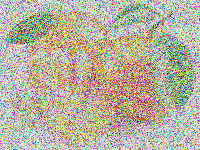

In [32]:
im.save('img_output.jpg')
im